<h1>Aplicación de técnicas de inteligencia artificial para evaluar la calidad del agua</h1>

<h2>Introducción</h2>

<p style="text-align: justify;">La Comisión Nacional del Agua (CONAGUA) es una dependencia del gobierno de México, encargada de mmonitorear y gestionar los cuerpos de aguas superficiales (lóticos, lénticos y costeros) y subterráneos del país</p>

<p style="text-align: justify;">La calidad del agua en sitios superficiales y subterráneos se categoriza a través de un semaforo el cual considera 3 colores, verde, amarillo y rojo, dependiendo el cumplimiento de los contaminantes con la regulación mexicana (DOF, 2023)</p>

<h2>Planteamiento del problema y justificación</h2>

<p style="text-align: justify;">La contaminación del agua en cuerpos superficiales y subterráneos es un problema ambiental creciente que afecta la calidad y disponibilidad del agua potable. La prescencia de contaminantes en estos cuerpos de agua representa un riesgo para la salud humana y los ecosistemas acuáticos.</p>

<p style="text-align: justify;">Este trabajo propone un sistema automatizado que por ahora está considerando solo los contaminantes que usa CONAGUA, pero que en un futuro es posible y sencillo agregar más variables de entrada si los datos medidos se encuentran disponibles.</p>

<h2>Objetivo General</h2>

<p style="text-align: justify;">El objetivo general de este proyecto es desarrollar un modelo de clasificacíon de la calidad del agua de cuerpos superficiales y subterráneos usando técnicas de aprendizaje automático y la base de datos reportada por CONAGUA.</p>

<h2>Objetivos Específicos</h2>

*   Descargar la base de datos del 2012-2022 que es reportada por CONAGUA, incluyendo los parámetros fisicoquímicos y microbiológicos, y otros metadatos.
*   Preprocesar los datos, incluyendo la limpieza, transformación y seleccion de características para el modelo de clasificación.
*   Entrenar y evaluar los modelos de clasificación basados en XGBoost, SVM, KNN, DT y MLR utilizando técnicas de validación cruzada y busqueda de hiperparámetros.
*   Comparar los modelos considerando diversas métricas de evaluación y seleccionar el mejor modelo para cada tipo de agua.
*   Desarrollar una aplicación con interfaz gráfica que estara disponible para que los usuarios apliquen el nuevo enfoque de clasificación.
*   Aplicar el nuevo enfoque de clasificación a los datos medidos en 2022 por CONAGUA.



<h2>Metodología</h2>

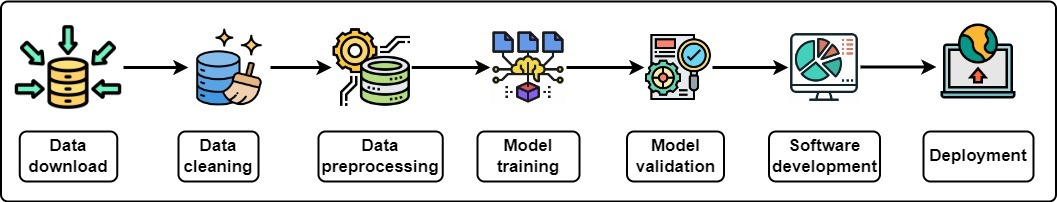

<h2>Cross Validation</h2>

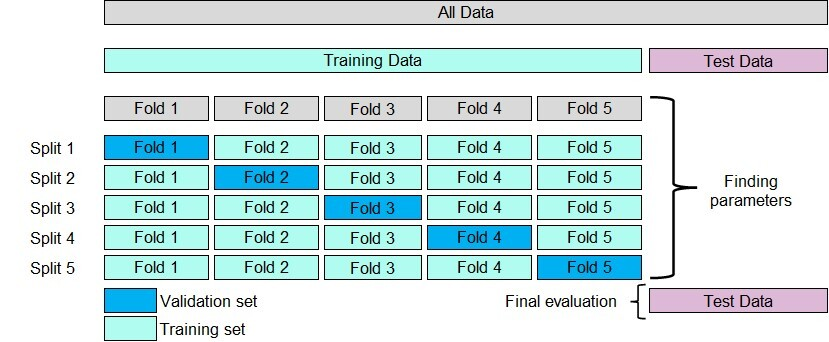

#Coastal

Import the necessary libraries

In [ ]:
#Import the necessary libraries
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pickle
import joblib
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, matthews_corrcoef, roc_auc_score, jaccard_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer

Load the data set

In [ ]:
# Load coastal data from Excel file into a DataFrame
df_coastal = pd.read_excel("https://raw.githubusercontent.com/Ricardo8932/ProyectoConagua/main/Database/Coastal/coastal_results.xlsx")

In [ ]:
# Creates a new DataFrame for nullity matrix (nm) from the years 2012 to 2021, excluding data for the year 2022
df_nm_2012_2021 = df_coastal[df_coastal['AÑO'] != 2022]

# Creates a new DataFrame for nullity matrix (nm) consisting only of data from the year 2022
df_nm_2022 = df_coastal[df_coastal['AÑO'] == 2022]

In [ ]:
# Display the first 5 rows of the coastal DataFrame
df_coastal.head(5)

,CLAVE SITIO,CLAVE MONITOREO,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,FECHA REALIZACIÓN,AÑO,TSS,FC,ODs%,ODm%,ODb%,FE,TF15s,TF15b
0,DLBAJ100,DLBAJ100-281012,"LOS CABOS SEG 22, 2 ISA10B",COSTERO,2012-11-12,2012,<10,<3,90.1,89.5,95.1,10,<1,<1
1,DLBAJ100,DLBAJ100-231212,"LOS CABOS SEG 22, 2 ISA10B",COSTERO,2013-01-07,2013,24,41,82.1,NaN,85.5,<3,<1,<1
2,DLBAJ100,DLBAJ100-070413,"LOS CABOS SEG 22, 2 ISA10B",COSTERO,2013-04-01,2013,34.3333,<1,110.17,NaN,NaN,<1,<1,<1
3,DLBAJ100,DLBAJ100-090613,"LOS CABOS SEG 22, 2 ISA10B",COSTERO,2013-06-03,2013,10.25,75,103.7,100.2,100.2,<1,<1,<1
4,DLBAJ100,DLBAJ100-110813,"LOS CABOS SEG 22, 2 ISA10B",COSTERO,2013-08-09,2013,<10,<1,89.5,92.01,93,<1,<1,<1


In [ ]:
#Replace "<, ≤, >, ≥" with ""
columns = df_coastal.columns.values

df_coastal[columns] = df_coastal[columns].replace({'<':''}, regex=True)
df_coastal[columns] = df_coastal[columns].replace({'>':''}, regex=True)
df_coastal[columns] = df_coastal[columns].replace({'≤':''}, regex=True)
df_coastal[columns] = df_coastal[columns].replace({'≥':''}, regex=True)

In [ ]:
# Check the first 5 rows of the coastal DataFrame to verify if '<, ≤' and '>, ≥' signs have been removed
df_coastal.head(5)

,CLAVE SITIO,CLAVE MONITOREO,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,FECHA REALIZACIÓN,AÑO,TSS,FC,ODs%,ODm%,ODb%,FE,TF15s,TF15b
0,DLBAJ100,DLBAJ100-281012,"LOS CABOS SEG 22, 2 ISA10B",COSTERO,2012-11-12,2012,10,3,90.1,89.5,95.1,10,1,1
1,DLBAJ100,DLBAJ100-231212,"LOS CABOS SEG 22, 2 ISA10B",COSTERO,2013-01-07,2013,24,41,82.1,NaN,85.5,3,1,1
2,DLBAJ100,DLBAJ100-070413,"LOS CABOS SEG 22, 2 ISA10B",COSTERO,2013-04-01,2013,34.3333,1,110.17,NaN,NaN,1,1,1
3,DLBAJ100,DLBAJ100-090613,"LOS CABOS SEG 22, 2 ISA10B",COSTERO,2013-06-03,2013,10.25,75,103.7,100.2,100.2,1,1,1
4,DLBAJ100,DLBAJ100-110813,"LOS CABOS SEG 22, 2 ISA10B",COSTERO,2013-08-09,2013,10,1,89.5,92.01,93,1,1,1


In [ ]:
df_coastal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23456 entries, 0 to 23455
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          23456 non-null  object        
 1   CLAVE MONITOREO      23456 non-null  object        
 2   NOMBRE DEL SITIO     23456 non-null  object        
 3   TIPO CUERPO DE AGUA  23456 non-null  object        
 4   FECHA REALIZACIÓN    23456 non-null  datetime64[ns]
 5   AÑO                  23456 non-null  int64         
 6   TSS                  23290 non-null  object        
 7   FC                   22430 non-null  object        
 8   ODs%                 22357 non-null  object        
 9   ODm%                 9040 non-null   object        
 10  ODb%                 7440 non-null   object        
 11  FE                   23137 non-null  object        
 12  TF15s                23181 non-null  object        
 13  TF15b                14857 non-

In [ ]:
# Change the data type of contaminant columns from object to float64
df_coastal = df_coastal.astype({'AÑO':'object','TSS':'float64','FC':'float64','ODs%':'float64','ODm%':'float64','ODb%':'float64','FE':'float64','TF15s':'float64','TF15b':'float64'})

In [ ]:
# Display summary statistics of the coastal DataFrame
df_coastal.describe()

,TSS,FC,ODs%,ODm%,ODb%,FE,TF15s,TF15b
count,23290.000000,22430.000000,22357.000000,9040.000000,7440.00000,23137.000000,23181.000000,14857.000000
mean,56.702114,1510.340660,84.959395,83.150245,80.51307,417.827765,1.035384,1.034754
std,167.116255,5356.001794,25.306520,23.384332,24.90048,2575.548958,1.000825,0.954894
min,10.000000,1.000000,10.000000,10.000000,2.50000,1.000000,1.000000,1.000000
25%,12.000000,4.000000,67.900000,68.000000,64.63750,3.000000,1.000000,1.000000
50%,24.000000,30.000000,88.000000,86.900000,85.00000,10.000000,1.000000,1.000000
75%,52.000000,282.000000,101.100000,99.500000,98.80000,20.000000,1.000000,1.000000
max,15003.500000,241960.000000,187.000000,150.000000,150.00000,34480.000000,74.630000,48.076900


In [ ]:
# Display the shape of the coastal DataFrame (number of rows and columns)
df_coastal.shape

(23456, 14)

In [ ]:
# Remove rows with missing values from the coastal DataFrame
df_coastal = df_coastal.dropna()

In [ ]:
# Verify that rows with missing values have been removed from the coastal DataFrame
df_coastal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5340 entries, 0 to 23397
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          5340 non-null   object        
 1   CLAVE MONITOREO      5340 non-null   object        
 2   NOMBRE DEL SITIO     5340 non-null   object        
 3   TIPO CUERPO DE AGUA  5340 non-null   object        
 4   FECHA REALIZACIÓN    5340 non-null   datetime64[ns]
 5   AÑO                  5340 non-null   object        
 6   TSS                  5340 non-null   float64       
 7   FC                   5340 non-null   float64       
 8   ODs%                 5340 non-null   float64       
 9   ODm%                 5340 non-null   float64       
 10  ODb%                 5340 non-null   float64       
 11  FE                   5340 non-null   float64       
 12  TF15s                5340 non-null   float64       
 13  TF15b                5340 non-nu

In [ ]:
# Exporting preprocessed dataset to Excel file.
# This code creates an Excel file of the preprocessed dataset, which has no missing values or unusual characters.
df_coastal.to_excel("coastal_preprocessed.xlsx")

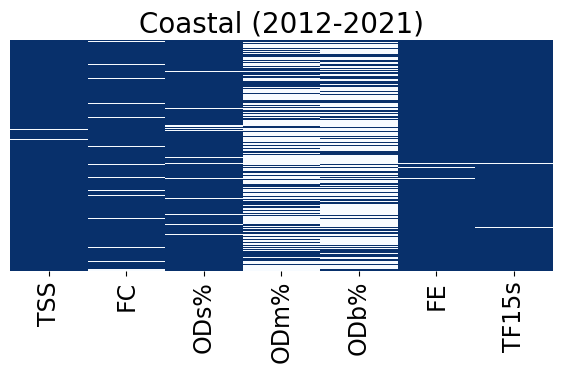

In [ ]:
# Select the columns you want to include in the heatmap
selected_columns_coastal_2012_2021 = df_nm_2012_2021.columns[6:13]  # Replace with the range of column names you want

# Create a heatmap of missing values for only the selected columns
plt.figure(figsize=(7,3))  # Adjust the size of the figure

# Generates a heat map showing the presence of missing values in selected columns
heatmap = sns.heatmap(df_nm_2012_2021[selected_columns_coastal_2012_2021].isnull(), cbar=False, cmap='Blues_r')

# Rotate the x-axis labels by 90 degrees so they are vertical and increase the font size
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=17)

# Remove the y-axis ticks and labels
heatmap.set_yticks([])
heatmap.set_yticklabels([])

plt.title('Coastal (2012-2021)', loc='center', fontsize=20)
plt.xlabel('', loc='center', fontsize=20)
plt.show()

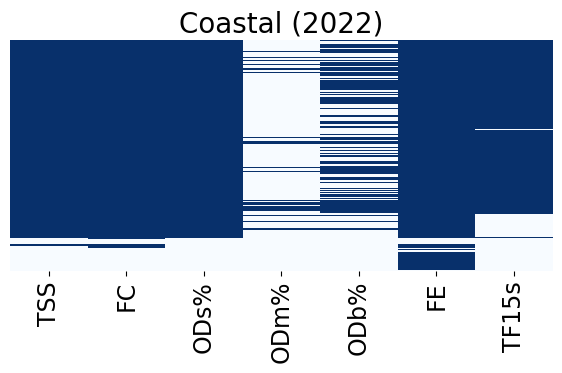

In [ ]:
# Select the columns you want to include in the heatmap
selected_columns_coastal_2022 = df_nm_2022.columns[6:13]  # Replace with the range of column names you want

# Create a heatmap of missing values for only the selected columns
plt.figure(figsize=(7,3))  # Adjust the size of the figure

# Generates a heat map showing the presence of missing values in selected columns
heatmap = sns.heatmap(df_nm_2022[selected_columns_coastal_2022].isnull(), cbar=False, cmap='Blues_r')

# Rotate the x-axis labels by 90 degrees so they are vertical and increase the font size
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=17)

# Remove the y-axis ticks and labels
heatmap.set_yticks([])
heatmap.set_yticklabels([])

plt.title('Coastal (2022)', loc='center', fontsize=20)
plt.xlabel('', loc='center', fontsize=20)
plt.show()

In [ ]:
#Realizar un analisis exploratorio de los datos anteriores, como matriz de nulidad, y grafica de correlacion y otro tipo de gracicas para el analisis exploratorio

Functions for the 'quality_' and 'complies_' columns


In [ ]:
# Create a new DataFrame 'data_coastal' by assigning NaN values to columns for water quality and compliance for each contaminant
data_coastal = df_coastal.assign(quality_TSS=np.nan,quality_FC=np.nan,quality_ODs=np.nan,quality_ODm=np.nan,quality_ODb=np.nan,quality_FE=np.nan,quality_TF15s=np.nan,quality_TF15b=np.nan,
                                complies_TSS=np.nan,complies_FC=np.nan,complies_ODs=np.nan,complies_ODm=np.nan,complies_ODb=np.nan,complies_FE=np.nan,complies_TF15s=np.nan,complies_TF15b=np.nan)

In [ ]:
data_coastal.columns

Index(['CLAVE SITIO', 'CLAVE MONITOREO', 'NOMBRE DEL SITIO',
       'TIPO CUERPO DE AGUA', 'FECHA REALIZACIÓN', 'AÑO', 'TSS', 'FC', 'ODs%',
       'ODm%', 'ODb%', 'FE', 'TF15s', 'TF15b', 'quality_TSS', 'quality_FC',
       'quality_ODs', 'quality_ODm', 'quality_ODb', 'quality_FE',
       'quality_TF15s', 'quality_TF15b', 'complies_TSS', 'complies_FC',
       'complies_ODs', 'complies_ODm', 'complies_ODb', 'complies_FE',
       'complies_TF15s', 'complies_TF15b'],
      dtype='object')

In [ ]:
# Display general information about the new columns added to the data_coastal DataFrame
data_coastal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5340 entries, 0 to 23397
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          5340 non-null   object        
 1   CLAVE MONITOREO      5340 non-null   object        
 2   NOMBRE DEL SITIO     5340 non-null   object        
 3   TIPO CUERPO DE AGUA  5340 non-null   object        
 4   FECHA REALIZACIÓN    5340 non-null   datetime64[ns]
 5   AÑO                  5340 non-null   object        
 6   TSS                  5340 non-null   float64       
 7   FC                   5340 non-null   float64       
 8   ODs%                 5340 non-null   float64       
 9   ODm%                 5340 non-null   float64       
 10  ODb%                 5340 non-null   float64       
 11  FE                   5340 non-null   float64       
 12  TF15s                5340 non-null   float64       
 13  TF15b                5340 non-nu

Function for the 'quality_' column

In [ ]:
#---------------------------quality_TSS---------------------------------------------------------------------------------
col = 'TSS'
conditions  = [ data_coastal[col] <= 25, (data_coastal[col] > 25) & (data_coastal[col] <= 75), (data_coastal[col] > 75) & (data_coastal[col] <= 150), (data_coastal[col] > 150) & (data_coastal[col] <= 400), data_coastal[col] > 400 ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_coastal['quality_TSS'] = np.select(conditions, choices, default=np.nan)

#---------------------------quality_FC-------------------------------------------------------------------
col = 'FC'
conditions  = [ data_coastal[col] <= 100, (data_coastal[col] > 100) & (data_coastal[col] <= 200), (data_coastal[col] > 200) & (data_coastal[col] <= 1000), (data_coastal[col] > 1000) & (data_coastal[col] <= 10000), data_coastal[col] > 10000 ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_coastal['quality_FC'] = np.select(conditions, choices, default=np.nan)

#---------------------------quality_ODs-------------------------------------------------------------------------
col = 'ODs%'
conditions  = [ (data_coastal[col] > 70) & (data_coastal[col] <= 110),
                (((data_coastal[col] > 50) & (data_coastal[col] <= 70))|((data_coastal[col] > 110)&(data_coastal[col] <= 120))),
                (((data_coastal[col] > 30) & (data_coastal[col] <= 50))|((data_coastal[col] > 120)&(data_coastal[col] <= 130))),
                (((data_coastal[col] > 10) & (data_coastal[col] <= 30))|((data_coastal[col] > 130)&(data_coastal[col] <= 150))),
                ((data_coastal[col] <= 10)|(data_coastal[col] > 150)) ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_coastal['quality_ODs'] = np.select(conditions, choices, default=np.nan)


#---------------------------quality_ODm-------------------------------------------------------------------------
col = 'ODm%'
conditions  = [ (data_coastal[col] > 70) & (data_coastal[col] <= 110),
                (((data_coastal[col] > 50) & (data_coastal[col] <= 70))|((data_coastal[col] > 110)&(data_coastal[col] <= 120))),
                (((data_coastal[col] > 30) & (data_coastal[col] <= 50))|((data_coastal[col] > 120)&(data_coastal[col] <= 130))),
                (((data_coastal[col] > 10) & (data_coastal[col] <= 30))|((data_coastal[col] > 130)&(data_coastal[col] <= 150))),
                ((data_coastal[col] <= 10)|(data_coastal[col] > 150)) ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_coastal['quality_ODm'] = np.select(conditions, choices, default=np.nan)

#---------------------------quality_ODb-------------------------------------------------------------------------
col = 'ODb%'
conditions  = [ (data_coastal[col] > 70) & (data_coastal[col] <= 110),
                (((data_coastal[col] > 50) & (data_coastal[col] <= 70))|((data_coastal[col] > 110)&(data_coastal[col] <= 120))),
                (((data_coastal[col] > 30) & (data_coastal[col] <= 50))|((data_coastal[col] > 120)&(data_coastal[col] <= 130))),
                (((data_coastal[col] > 10) & (data_coastal[col] <= 30))|((data_coastal[col] > 130)&(data_coastal[col] <= 150))),
                ((data_coastal[col] <= 10)|(data_coastal[col] > 150)) ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_coastal['quality_ODb'] = np.select(conditions, choices, default=np.nan)

#---------------------------quality_FE--------------------------------------------------------------------------------
col = 'FE'
conditions  = [ data_coastal[col] <= 100, (data_coastal[col] > 100) & (data_coastal[col] <= 200), (data_coastal[col] > 200) & (data_coastal[col] <= 500), data_coastal[col] > 500 ]
choices     = [ 'Excelente', 'Buena calidad', 'Contaminada', 'Fuertemente contaminada']
data_coastal['quality_FE'] = np.select(conditions, choices, default=np.nan)

#---------------------------quality_TF15s---------------------------------------------------------------------
col = 'TF15s'
conditions  = [(data_coastal[col] < 1), (data_coastal[col] >= 1) & (data_coastal[col] <= 1.33), (data_coastal[col] > 1.33) & (data_coastal[col] < 5), data_coastal[col] >= 5 ]
choices     = [ 'No tóxico', 'Toxicidad baja', 'Toxicidad moderada', 'Toxicidad alta' ]
data_coastal['quality_TF15s'] = np.select(conditions, choices, default=np.nan)


#---------------------------quality_TF15b---------------------------------------------------------------------
col = 'TF15b'
conditions  = [(data_coastal[col] < 1), (data_coastal[col] >= 1) & (data_coastal[col] <= 1.33), (data_coastal[col] > 1.33) & (data_coastal[col] < 5), data_coastal[col] >= 5 ]
choices     = [ 'No tóxico', 'Toxicidad baja', 'Toxicidad moderada', 'Toxicidad alta' ]
data_coastal['quality_TF15b'] = np.select(conditions, choices, default=np.nan)

In [ ]:
data_coastal.iloc[:5, 14:21] #Columnas tipo de quality_

,quality_TSS,quality_FC,quality_ODs,quality_ODm,quality_ODb,quality_FE,quality_TF15s
0,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Toxicidad baja
3,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Toxicidad baja
4,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Toxicidad baja
5,Excelente,Aceptable,Excelente,Excelente,Excelente,Excelente,Toxicidad baja
6,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Toxicidad baja


Function for the 'complies_' column

In [ ]:
#---------------------------complies for quality_TSS-----------------------------------------------------
col = 'quality_TSS'
conditions  = [ data_coastal[col] == 'Excelente', data_coastal[col] == 'Buena calidad', data_coastal[col] == 'Aceptable', data_coastal[col] == 'Contaminada', data_coastal[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_coastal['complies_TSS'] = np.select(conditions, choices, default=np.nan)
data_coastal['complies_TSS'] = data_coastal['complies_TSS'].astype('int32')

#---------------------------complies for quality_FC-----------------------------------------------------
col = 'quality_FC'
conditions  = [ data_coastal[col] == 'Excelente', data_coastal[col] == 'Buena calidad', data_coastal[col] == 'Aceptable', data_coastal[col] == 'Contaminada', data_coastal[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_coastal['complies_FC'] = np.select(conditions, choices, default=np.nan)
data_coastal['complies_FC'] = data_coastal['complies_FC'].astype('int32')

#---------------------------complies for quality_ODs-----------------------------------------------------
col = 'quality_ODs'
conditions  = [ data_coastal[col] == 'Excelente', data_coastal[col] == 'Buena calidad', data_coastal[col] == 'Aceptable', data_coastal[col] == 'Contaminada', data_coastal[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_coastal['complies_ODs'] = np.select(conditions, choices, default=np.nan)
data_coastal['complies_ODs'] = data_coastal['complies_ODs'].astype('int32')

#---------------------------complies for quality_ODm-----------------------------------------------------
col = 'quality_ODm'
conditions  = [ data_coastal[col] == 'Excelente', data_coastal[col] == 'Buena calidad', data_coastal[col] == 'Aceptable', data_coastal[col] == 'Contaminada', data_coastal[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_coastal['complies_ODm'] = np.select(conditions, choices, default=np.nan)
data_coastal['complies_ODm'] = data_coastal['complies_ODm'].astype('int32')

#---------------------------complies for quality_ODb-----------------------------------------------------
col = 'quality_ODb'
conditions  = [ data_coastal[col] == 'Excelente', data_coastal[col] == 'Buena calidad', data_coastal[col] == 'Aceptable', data_coastal[col] == 'Contaminada', data_coastal[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_coastal['complies_ODb'] = np.select(conditions, choices, default=np.nan)
data_coastal['complies_ODb'] = data_coastal['complies_ODb'].astype('int32')

#---------------------------complies for quality_FE-----------------------------------------------------
col = 'quality_FE'
conditions  = [ data_coastal[col] == 'Excelente', data_coastal[col] == 'Buena calidad', data_coastal[col] == 'Contaminada', data_coastal[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 0, 0 ]
data_coastal['complies_FE'] = np.select(conditions, choices, default=np.nan)
data_coastal['complies_FE'] = data_coastal['complies_FE'].astype('int32')

#---------------------------complies for quality_TF15s-----------------------------------------------------
col = 'quality_TF15s'
conditions  = [ data_coastal[col] == 'No tóxico', data_coastal[col] == 'Toxicidad baja', data_coastal[col] == 'Toxicidad moderada', data_coastal[col] == 'Toxicidad alta']
choices     = [ 1, 1, 1, 0 ]
data_coastal['complies_TF15s'] = np.select(conditions, choices, default=np.nan)
data_coastal['complies_TF15s'] = data_coastal['complies_TF15s'].astype('int32')

#---------------------------complies for quality_TF15b-----------------------------------------------------
col = 'quality_TF15b'
conditions  = [ data_coastal[col] == 'No tóxico', data_coastal[col] == 'Toxicidad baja', data_coastal[col] == 'Toxicidad moderada', data_coastal[col] == 'Toxicidad alta']
choices     = [ 1, 1, 1, 0 ]
data_coastal['complies_TF15b'] = np.select(conditions, choices, default=np.nan)
data_coastal['complies_TF15b'] = data_coastal['complies_TF15b'].astype('int32')

In [ ]:
data_coastal.iloc[:5, 22:]

,complies_TSS,complies_FC,complies_ODs,complies_ODm,complies_ODb,complies_FE,complies_TF15s,complies_TF15b
0,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1


Assignment of water quality

In [ ]:
conditions  = [(data_coastal['complies_TF15s'] == 0) | (data_coastal['complies_TF15b'] == 0) | (data_coastal['complies_FE'] == 0),
               (data_coastal['complies_FC'] == 0) | (data_coastal['complies_TSS'] == 0) | (data_coastal['complies_ODs'] == 0) | (data_coastal['complies_ODm'] == 0) | (data_coastal['complies_ODb'] == 0),
               (data_coastal['complies_FC'] == 1) & (data_coastal['complies_TF15s'] == 1) & (data_coastal['complies_TF15b'] == 1) & (data_coastal['complies_ODs'] == 1) & (data_coastal['complies_ODm'] == 1) & (data_coastal['complies_ODb'] == 1) & (data_coastal['complies_FE'] == 1) & (data_coastal['complies_TSS'] == 1)]
choices     = [2, 1, 0]
data_coastal['Water quality'] = np.select(conditions, choices, default=np.nan)
data_coastal['Water quality'] = data_coastal['Water quality'].astype('int32')

In [ ]:
data_coastal.iloc[:5, 22:]

,complies_TSS,complies_FC,complies_ODs,complies_ODm,complies_ODb,complies_FE,complies_TF15s,complies_TF15b,Water quality
0,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,0
5,1,1,1,1,1,1,1,1,0
6,1,1,1,1,1,1,1,1,0


In [ ]:
data_coastal.to_excel("coastal_complete.xlsx")

In [ ]:
df_coastal_water_quality = data_coastal.iloc[:, list(range(0, 14)) + [30]]
df_coastal_water_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5340 entries, 0 to 23397
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          5340 non-null   object        
 1   CLAVE MONITOREO      5340 non-null   object        
 2   NOMBRE DEL SITIO     5340 non-null   object        
 3   TIPO CUERPO DE AGUA  5340 non-null   object        
 4   FECHA REALIZACIÓN    5340 non-null   datetime64[ns]
 5   AÑO                  5340 non-null   object        
 6   TSS                  5340 non-null   float64       
 7   FC                   5340 non-null   float64       
 8   ODs%                 5340 non-null   float64       
 9   ODm%                 5340 non-null   float64       
 10  ODb%                 5340 non-null   float64       
 11  FE                   5340 non-null   float64       
 12  TF15s                5340 non-null   float64       
 13  TF15b                5340 non-nu

In [ ]:
df_coastal_water_quality.to_excel("coastal_water-quality.xlsx")

In [ ]:
# Agrupar por año y contar los valores de la columna "Water quality" para cada grupo
conteo_por_año = df_coastal_water_quality.groupby('AÑO')['Water quality'].value_counts().unstack(fill_value=0)

# Mostrar el resultado
print(conteo_por_año)

Water quality    0    1    2
AÑO                         
2012           195   41   16
2013           829  371  111
2014           809  226   99
2015           643  127   57
2016           586  133   39
2017           430   68   62
2018           349   33   46
2019            41    4    4
2022            16    5    0


In [ ]:
conteo_por_año = conteo_por_año.T

In [ ]:
# Obtener el número de valores de la clase 0 para el año 2015
num_clase_0_2015 = conteo_por_año.loc[0, 2015]
print("Número de valores de la clase 0 en el año 2015:", num_clase_0_2015)

Número de valores de la clase 0 en el año 2015: 643


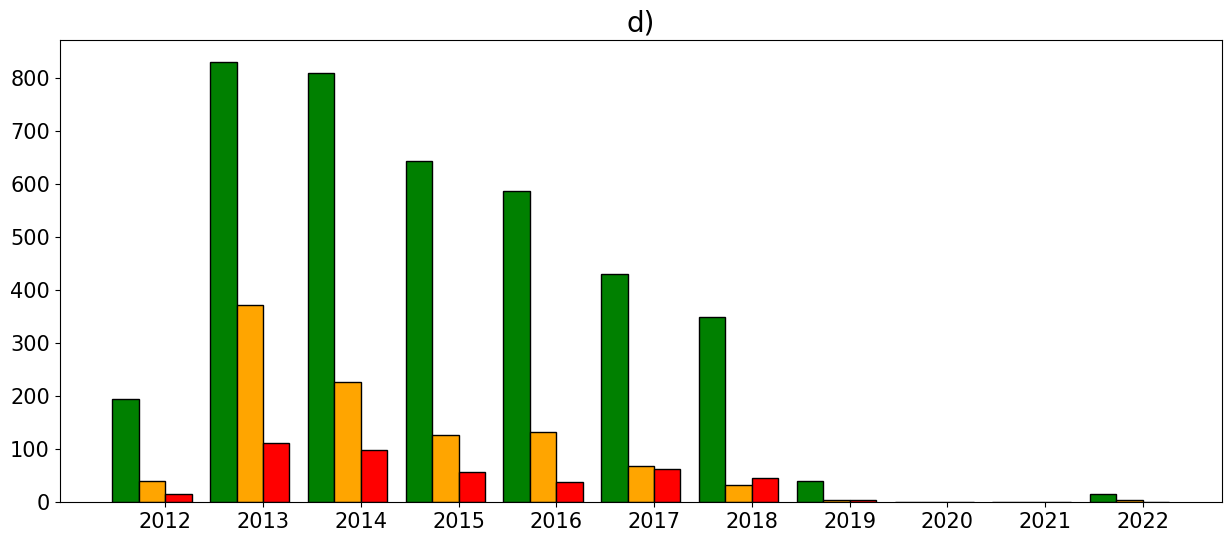

In [ ]:
#Coastal
import pandas as pd
import matplotlib.pyplot as plt

# Crear datos
df = pd.DataFrame([['2012', 195, 41, 16], ['2013', 829, 371, 111], ['2014', 809, 226, 99], ['2015', 643, 127, 57], ['2016', 586, 133, 39], ['2017', 430, 68, 62], ['2018', 349, 33, 46], ['2019', 41, 4, 4], ['2020', 0, 0, 0], ['2021', 0, 0, 0], ['2022', 16, 5, 0]],
                  columns=['Year', 'Good', 'Regular', 'Poor'])

# Definir colores para cada valor
colors = ["green", "orange", "red"]  # Puedes ajustar los colores según tus preferencias

# Ajustar el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Ajustar la separación entre barras y el ancho de las barras
bar_width = 0.27  # Ajusta este valor para hacer las barras más delgadas
bar_positions = range(len(df["Year"]))

# Barra Good
bar1 = plt.bar(bar_positions, df["Good"], width=bar_width, color=colors[0], edgecolor='black', label="Good")

# Barra Regular
bar2 = plt.bar([pos + bar_width for pos in bar_positions], df["Regular"], width=bar_width, color=colors[1], edgecolor='black', label="Regular")

# Barra Poor
bar3 = plt.bar([pos + 2*bar_width for pos in bar_positions], df["Poor"], width=bar_width, color=colors[2], edgecolor='black', label="Poor")

plt.ylabel('', fontsize=15)
plt.xlabel('')
plt.title('d)', fontsize=20)  # Ajusta el tamaño del título según tus preferencias


# Ajustar las etiquetas del eje x
new_positions = [pos + 1.5 * bar_width for pos in bar_positions]
plt.xticks(new_positions, df["Year"], fontsize=15)

# Aumentar el tamaño de las etiquetas del eje y
plt.yticks(fontsize=15)

# Añadir valores dentro de cada barra con fuente más grande y en negrita
#for bar, category in zip([bar1, bar2, bar3], ["Good", "Regular", "Poor"]):
#    plt.bar_label(bar, label_type='edge', labels=df[category], fontsize=12, fontweight='bold', color='black')

# Quitar el cuadriculado
plt.grid(False)

# Mover la leyenda fuera de las barras
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


In [ ]:
# Creates a new DataFrame for model training from the years 2012 to 2021, excluding data for the year 2022
df_train_coastal = data_coastal[data_coastal['AÑO'] != 2022]

# Creates a new DataFrame for validation consisting only of data from the year 2022
df_val_coastal = data_coastal[data_coastal['AÑO'] == 2022]

In [ ]:
# Displays the size of the training DataFrame
df_train_coastal.shape

(5319, 31)

In [ ]:
# Displays the size of the validation DataFrame
df_val_coastal.shape

(21, 31)

In [ ]:
# Selects columns for model training including contaminant columns and the target variable 'Water quality' for the dataset from 2012 to 2021
df_train_coastal = df_train_coastal.iloc[:, list(range(6, 14)) + [30]]
df_train_coastal.head(5)

,TSS,FC,ODs%,ODm%,ODb%,FE,TF15s,TF15b,Water quality
0,10.00,3.0,90.1,89.50,95.1,10.0,1.0,1.0,0
3,10.25,75.0,103.7,100.20,100.2,1.0,1.0,1.0,0
4,10.00,1.0,89.5,92.01,93.0,1.0,1.0,1.0,0
5,21.25,265.0,105.8,105.90,105.8,10.0,1.0,1.0,0
6,13.00,41.0,109.3,107.20,105.1,1.0,1.0,1.0,0


In [ ]:
# Selects columns for model training including contaminant columns and the target variable 'Water quality' for the dataset of 2022
df_val_coastal = df_val_coastal.iloc[:, list(range(6, 14)) + [30]]
df_val_coastal.head(5)

,TSS,FC,ODs%,ODm%,ODb%,FE,TF15s,TF15b,Water quality
23245,10.0,1500.0,74.1,56.8,34.8,10.0,1.0,1.0,1
23250,40.2,63.0,83.4,72.7,65.0,10.0,1.0,1.0,0
23253,34.4,393.0,78.7,66.9,56.7,10.0,1.0,1.0,0
23257,40.0,295.0,74.4,65.5,57.2,10.0,1.0,1.0,0
23261,22.3,279.0,85.4,78.6,65.1,10.0,1.0,1.0,0


Separation of the dependent variable (y) from the independent variables (X)

In [ ]:
# Separates features (X_train_coastal) and target variable (y_train_coastal) for model training
X_train_coastal = df_train_coastal.drop(columns=['Water quality'])
y_train_coastal = df_train_coastal['Water quality']

In [ ]:
# Separates features (X_val_coastal) and target variable (y_val_coastal) for validation
X_val_coastal = df_val_coastal.drop(columns=['Water quality'])
y_val_coastal = df_val_coastal['Water quality']

In [ ]:
# Calculate the count of classes present in the 'Water quality' column
conteo_clases = df_train_coastal['Water quality'].value_counts()
print(conteo_clases)

0    3882
1    1003
2     434
Name: Water quality, dtype: int64


Split data into training and test set

In [ ]:
# Split the data into training and testing sets for XGBoost model training
X_train_ub_coa, X_test_ub_coa, y_train_ub_coa, y_test_ub_coa = train_test_split(X_train_coastal, y_train_coastal, test_size=0.2, random_state=42)

In [ ]:
X_train_ub_coa.shape

(4255, 8)

In [ ]:
X_test_ub_coa.shape

(1064, 8)

In [ ]:
# Guardar el conjunto de entrenamiento en un archivo Excel
X_train_ub_coa.to_excel("train_data_ub_coa.xlsx", index=False)
y_train_ub_coa.to_excel("train_labels_data_ub_coa.xlsx", index=False)

# Guardar el conjunto de prueba en un archivo Excel
X_test_ub_coa.to_excel("test_data_ub_coa.xlsx", index=False)
y_test_ub_coa.to_excel("test_labels_data_ub_coa.xlsx", index=False)

Feature Standardization for Coastal Dataset using StandardScaler

In [ ]:
# Create a StandardScaler object
scaler_ub_coa = StandardScaler()

# Fit and transform the training data to standardize features
X_train_ub_coa = scaler_ub_coa.fit_transform(X_train_ub_coa)

# Transform the test data using the same scaler to maintain consistency in feature scaling
X_test_ub_coa = scaler_ub_coa.transform(X_test_ub_coa)

##Unbalanced

###XGBOOST

Hyperparameter Grid for XGBoost Model

In [ ]:
# Define a dictionary of hyperparameters for tuning a XGBoost model
parameters = {
    'learning_rate': [.01, 0.1, 0.2],
    'max_depth': [10, 30, 50],
    'n_estimators': [100, 200, 300]
}

Create a Decision XGBoost model

In [ ]:
# Initialize XGBoost classifier for coastal model
model_ub_coa_xgb = XGBClassifier()

Hyperparameter Tuning with Cross-Validation

In [ ]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Create a GridSearchCV object for hyperparameter tuning
grid_search_ub_coa_xgb = GridSearchCV(model_ub_coa_xgb, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search_ub_coa_xgb.fit(X_train_ub_coa, y_train_ub_coa)

Wait a moment...


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [10, 30, 50],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

Best Estimator and Hyperparameters

In [ ]:
# Print the best estimator found during hyperparameter search
print("Best estimator found:")
best_model_ub_coa_xgb = grid_search_ub_coa_xgb.best_estimator_
print(best_model_ub_coa_xgb)

# Print the best hyperparameters found during hyperparameter search
print("\nBest hyperparameters found:")
best_params_ub_coa_xgb = grid_search_ub_coa_xgb.best_params_
print(best_params_ub_coa_xgb)

# Print the score of the best model in coastal_no_balancing cross-validation
print("\nScore of the best model in coastal_no_balancing cross-validation:")
best_score_ub_coa_xgb = grid_search_ub_coa_xgb.best_score_
print(best_score_ub_coa_xgb)

Best estimator found:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Best hyperparameters found:
{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}

Score of the best model in coastal_no_balancing cross-validation:
0.9938895417156287


 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred_train_ub_coa_xgb = best_model_ub_coa_xgb.predict(X_train_ub_coa)

# Evaluation metrics on the training set
accuracy_train_ub_coa_xgb = accuracy_score(y_train_ub_coa, y_pred_train_ub_coa_xgb)
precision_train_ub_coa_xgb = precision_score(y_train_ub_coa, y_pred_train_ub_coa_xgb, average='weighted')
# Calculate precision for each class
precision_x_class_train_ub_coa_xgb = precision_score(y_train_ub_coa, y_pred_train_ub_coa_xgb, average=None)
recall_train_ub_coa_xgb = recall_score(y_train_ub_coa, y_pred_train_ub_coa_xgb, average='weighted')
# Calculate recall for each class
recall_x_class_train_ub_coa_xgb = recall_score(y_train_ub_coa, y_pred_train_ub_coa_xgb, average=None)
f1_score_train_ub_coa_xgb = f1_score(y_train_ub_coa, y_pred_train_ub_coa_xgb, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_train_ub_coa_xgb = f1_score(y_train_ub_coa, y_pred_train_ub_coa_xgb, average=None)
jaccard_train_ub_coa_xgb = jaccard_score(y_train_ub_coa, y_pred_train_ub_coa_xgb, average='weighted')
confusion_train_ub_coa_xgb = confusion_matrix(y_train_ub_coa, y_pred_train_ub_coa_xgb)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy_train_ub_coa_xgb)
print("Precision: ", precision_train_ub_coa_xgb)
print("Precision per class:" , precision_x_class_train_ub_coa_xgb )
print("Recall: ", recall_train_ub_coa_xgb)
print("Recall per class:" , recall_x_class_train_ub_coa_xgb )
print("F1 Score: ", f1_score_train_ub_coa_xgb)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_train_ub_coa_xgb):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_train_ub_coa_xgb )
print("Confusion Matrix: ")
print(confusion_train_ub_coa_xgb)

Accuracy:  0.9988249118683902
Precision:  0.9988265143511595
Precision per class: [0.99935588 0.99626866 1.        ]
Recall:  0.9988249118683902
Recall per class: [0.99903413 0.99875312 0.99711816]
F1 Score:  0.9988252330546723
F1-score for the class 0: 0.999194976654323
F1-score for the class 1: 0.9975093399750935
F1-score for the class 2: 0.9985569985569985
jaccard: 0.9976540832750918
Confusion Matrix: 
[[3103    3    0]
 [   1  801    0]
 [   1    0  346]]


 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred_test_ub_coa_xgb = best_model_ub_coa_xgb.predict(X_test_ub_coa)

# Evaluation metrics on the testing set
accuracy_test_ub_coa_xgb = accuracy_score(y_test_ub_coa, y_pred_test_ub_coa_xgb)
precision_test_ub_coa_xgb = precision_score(y_test_ub_coa, y_pred_test_ub_coa_xgb, average='weighted')
# Calculate precision for each class
precision_x_class_test_ub_coa_xgb = precision_score(y_test_ub_coa, y_pred_test_ub_coa_xgb, average=None)
recall_test_ub_coa_xgb = recall_score(y_test_ub_coa, y_pred_test_ub_coa_xgb, average='weighted')
# Calculate recall for each class
recall_x_class_test_ub_coa_xgb = recall_score(y_test_ub_coa, y_pred_test_ub_coa_xgb, average=None)
f1_score_test_ub_coa_xgb = f1_score(y_test_ub_coa, y_pred_test_ub_coa_xgb, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_test_ub_coa_xgb = f1_score(y_test_ub_coa, y_pred_test_ub_coa_xgb, average=None)
jaccard_test_ub_coa_xgb = jaccard_score(y_test_ub_coa, y_pred_test_ub_coa_xgb, average='weighted')
confusion_test_ub_coa_xgb = confusion_matrix(y_test_ub_coa, y_pred_test_ub_coa_xgb)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy_test_ub_coa_xgb)
print("Precision: ", precision_test_ub_coa_xgb)
print("Precision per class:" , precision_x_class_test_ub_coa_xgb )
print("Recall: ", recall_test_ub_coa_xgb)
print("Recall per class:" , recall_x_class_test_ub_coa_xgb )
print("F1 Score: ", f1_score_test_ub_coa_xgb)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_test_ub_coa_xgb):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_test_ub_coa_xgb )
print("Confusion Matrix: ")
print(confusion_test_ub_coa_xgb)

Accuracy:  0.9971804511278195
Precision:  0.9971781710550508
Precision per class: [0.997426 0.995    1.      ]
Recall:  0.9971804511278195
Recall per class: [0.99871134 0.99004975 1.        ]
F1 Score:  0.9971778432557574
F1-score for the class 0: 0.9980682549903412
F1-score for the class 1: 0.9925187032418954
F1-score for the class 2: 1.0
jaccard: 0.9943821086159873
Confusion Matrix: 
[[775   1   0]
 [  2 199   0]
 [  0   0  87]]


 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val_ub_coa_xgb = scaler_ub_coa.transform(X_val_coastal)

# Make predictions on the validation set using the trained xgboost model
y_pred_val_ub_coa_xgb = best_model_ub_coa_xgb.predict(X_val_ub_coa_xgb)

# Evaluation metrics on the validation set
accuracy_val_ub_coa_xgb = accuracy_score(y_val_coastal, y_pred_val_ub_coa_xgb)
precision_val_ub_coa_xgb = precision_score(y_val_coastal, y_pred_val_ub_coa_xgb, average='weighted')
# Calculate precision for each class
precision_x_class_val_ub_coa_xgb = precision_score(y_val_coastal, y_pred_val_ub_coa_xgb, average=None)
recall_val_ub_coa_xgb = recall_score(y_val_coastal, y_pred_val_ub_coa_xgb, average='weighted')
# Calculate recall for each class
recall_x_class_val_ub_coa_xgb = recall_score(y_val_coastal, y_pred_val_ub_coa_xgb, average=None)
f1_score_val_ub_coa_xgb = f1_score(y_val_coastal, y_pred_val_ub_coa_xgb, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_val_ub_coa_xgb = f1_score(y_val_coastal, y_pred_val_ub_coa_xgb, average=None)
jaccard_val_ub_coa_xgb = jaccard_score(y_val_coastal, y_pred_val_ub_coa_xgb, average='weighted')
confusion_val_ub_coa_xgb = confusion_matrix(y_val_coastal, y_pred_val_ub_coa_xgb)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy_val_ub_coa_xgb)
print("Precision: ", precision_val_ub_coa_xgb)
print("Precision per class:" , precision_x_class_val_ub_coa_xgb )
print("Recall: ", recall_val_ub_coa_xgb)
print("Recall per class:" , recall_x_class_val_ub_coa_xgb )
print("F1 Score: ", f1_score_val_ub_coa_xgb)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_val_ub_coa_xgb):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_val_ub_coa_xgb )
print("Confusion Matrix: ")
print(confusion_val_ub_coa_xgb)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1.]
Recall:  1.0
Recall per class: [1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
jaccard: 1.0
Confusion Matrix: 
[[16  0]
 [ 0  5]]


In [ ]:
# Save the trained XGBoost model to a file
with open('best_model_ub_coa_xgb.pkl', 'wb') as model_file:
    pickle.dump(best_model_ub_coa_xgb, model_file)

# Save the scaler used for preprocessing to a file
with open('scaler_ub_coa_xgb.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_ub_coa, scaler_file)

###SVM

Hyperparameter Grid for SVM Model

In [ ]:
# Define a dictionary of hyperparameters for tuning a SVM model
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto'],
}

Create a Decision SVM model

In [ ]:
#Create a Decision SVM model
model_ub_coa_svm = SVC()

Hyperparameter Tuning with Cross-Validation

In [ ]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Create a GridSearchCV object for hyperparameter tuning
grid_search_ub_coa_svm = GridSearchCV(model_ub_coa_svm, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search_ub_coa_svm.fit(X_train_ub_coa, y_train_ub_coa)

Wait a moment...


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

Best Estimator and Hyperparameters

In [ ]:
# Print the best estimator found during hyperparameter search
print("Best estimator found:")
best_model_ub_coa_svm = grid_search_ub_coa_svm.best_estimator_
print(best_model_ub_coa_svm)

# Print the best hyperparameters found during hyperparameter search
print("\nBest hyperparameters found:")
best_params_ub_coa_svm = grid_search_ub_coa_svm.best_params_
print(best_params_ub_coa_svm)

# Print the score of the best model in coastal_no_balancing cross-validation
print("\nScore of the best model in coastal_no_balancing cross-validation:")
best_score_ub_coa_svm = grid_search_ub_coa_svm.best_score_
print(best_score_ub_coa_svm)

Best estimator found:
SVC(C=10, gamma='auto')

Best hyperparameters found:
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Score of the best model in coastal_no_balancing cross-validation:
0.9623971797884842


 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred_train_ub_coa_svm = best_model_ub_coa_svm.predict(X_train_ub_coa)

# Evaluation metrics on the training set
accuracy_train_ub_coa_svm = accuracy_score(y_train_ub_coa, y_pred_train_ub_coa_svm)
precision_train_ub_coa_svm = precision_score(y_train_ub_coa, y_pred_train_ub_coa_svm, average='weighted')
# Calculate precision for each class
precision_x_class_train_ub_coa_svm = precision_score(y_train_ub_coa, y_pred_train_ub_coa_svm, average=None)
recall_train_ub_coa_svm = recall_score(y_train_ub_coa, y_pred_train_ub_coa_svm, average='weighted')
# Calculate recall for each class
recall_x_class_train_ub_coa_svm = recall_score(y_train_ub_coa, y_pred_train_ub_coa_svm, average=None)
f1_score_train_ub_coa_svm = f1_score(y_train_ub_coa, y_pred_train_ub_coa_svm, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_train_ub_coa_svm = f1_score(y_train_ub_coa, y_pred_train_ub_coa_svm, average=None)
jaccard_train_ub_coa_svm = jaccard_score(y_train_ub_coa, y_pred_train_ub_coa_svm, average='weighted')
confusion_train_ub_coa_svm = confusion_matrix(y_train_ub_coa, y_pred_train_ub_coa_svm)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy_train_ub_coa_svm)
print("Precision: ", precision_train_ub_coa_svm)
print("Precision per class:" , precision_x_class_train_ub_coa_svm )
print("Recall: ", recall_train_ub_coa_svm)
print("Recall per class:" , recall_x_class_train_ub_coa_svm )
print("F1 Score: ", f1_score_train_ub_coa_svm)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_train_ub_coa_svm):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_train_ub_coa_svm )
print("Confusion Matrix: ")
print(confusion_train_ub_coa_svm)

Accuracy:  0.9699177438307873
Precision:  0.9703700778146039
Precision per class: [0.97382529 0.94416873 1.        ]
Recall:  0.9699177438307873
Recall per class: [0.99420476 0.94887781 0.80115274]
F1 Score:  0.9691706477249029
F1-score for the class 0: 0.9839095109128565
F1-score for the class 1: 0.9465174129353233
F1-score for the class 2: 0.8896000000000001
jaccard: 0.9415270954251913
Confusion Matrix: 
[[3088   18    0]
 [  41  761    0]
 [  42   27  278]]


 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred_test_ub_coa_svm = best_model_ub_coa_svm.predict(X_test_ub_coa)

# Evaluation metrics on the testing set
accuracy_test_ub_coa_svm = accuracy_score(y_test_ub_coa, y_pred_test_ub_coa_svm)
precision_test_ub_coa_svm = precision_score(y_test_ub_coa, y_pred_test_ub_coa_svm, average='weighted')
# Calculate precision for each class
precision_x_class_test_ub_coa_svm = precision_score(y_test_ub_coa, y_pred_test_ub_coa_svm, average=None)
recall_test_ub_coa_svm = recall_score(y_test_ub_coa, y_pred_test_ub_coa_svm, average='weighted')
# Calculate recall for each class
recall_x_class_test_ub_coa_svm = recall_score(y_test_ub_coa, y_pred_test_ub_coa_svm, average=None)
f1_score_test_ub_coa_svm = f1_score(y_test_ub_coa, y_pred_test_ub_coa_svm, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_test_ub_coa_svm = f1_score(y_test_ub_coa, y_pred_test_ub_coa_svm, average=None)
jaccard_test_ub_coa_svm = jaccard_score(y_test_ub_coa, y_pred_test_ub_coa_svm, average='weighted')
confusion_test_ub_coa_svm = confusion_matrix(y_test_ub_coa, y_pred_test_ub_coa_svm)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy_test_ub_coa_svm)
print("Precision: ", precision_test_ub_coa_svm)
print("Precision per class:" , precision_x_class_test_ub_coa_svm )
print("Recall: ", recall_test_ub_coa_svm)
print("Recall per class:" , recall_x_class_test_ub_coa_svm )
print("F1 Score: ", f1_score_test_ub_coa_svm)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_test_ub_coa_svm):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_test_ub_coa_svm )
print("Confusion Matrix: ")
print(confusion_test_ub_coa_svm)

Accuracy:  0.9624060150375939
Precision:  0.9631150149807105
Precision per class: [0.96737767 0.93069307 1.        ]
Recall:  0.9624060150375939
Recall per class: [0.9935567  0.93532338 0.74712644]
F1 Score:  0.9611356418518322
F1-score for the class 0: 0.9802924348378894
F1-score for the class 1: 0.9330024813895781
F1-score for the class 2: 0.8552631578947367
jaccard: 0.927408954009451
Confusion Matrix: 
[[771   5   0]
 [ 13 188   0]
 [ 13   9  65]]


 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val_ub_coa_svm = scaler_ub_coa.transform(X_val_coastal)

# Make predictions on the validation set using the trained svm model
y_pred_val_ub_coa_svm = best_model_ub_coa_svm.predict(X_val_ub_coa_svm)

# Evaluation metrics on the validation set
accuracy_val_ub_coa_svm = accuracy_score(y_val_coastal, y_pred_val_ub_coa_svm)
precision_val_ub_coa_svm = precision_score(y_val_coastal, y_pred_val_ub_coa_svm, average='weighted')
# Calculate precision for each class
precision_x_class_val_ub_coa_svm = precision_score(y_val_coastal, y_pred_val_ub_coa_svm, average=None)
recall_val_ub_coa_svm = recall_score(y_val_coastal, y_pred_val_ub_coa_svm, average='weighted')
# Calculate recall for each class
recall_x_class_val_ub_coa_svm = recall_score(y_val_coastal, y_pred_val_ub_coa_svm, average=None)
f1_score_val_ub_coa_svm = f1_score(y_val_coastal, y_pred_val_ub_coa_svm, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_val_ub_coa_svm = f1_score(y_val_coastal, y_pred_val_ub_coa_svm, average=None)
jaccard_val_ub_coa_svm = jaccard_score(y_val_coastal, y_pred_val_ub_coa_svm, average='weighted')
confusion_val_ub_coa_svm = confusion_matrix(y_val_coastal, y_pred_val_ub_coa_svm)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy_val_ub_coa_svm)
print("Precision: ", precision_val_ub_coa_svm)
print("Precision per class:" , precision_x_class_val_ub_coa_svm )
print("Recall: ", recall_val_ub_coa_svm)
print("Recall per class:" , recall_x_class_val_ub_coa_svm )
print("F1 Score: ", f1_score_val_ub_coa_svm)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_val_ub_coa_svm):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_val_ub_coa_svm )
print("Confusion Matrix: ")
print(confusion_val_ub_coa_svm)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1.]
Recall:  1.0
Recall per class: [1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
jaccard: 1.0
Confusion Matrix: 
[[16  0]
 [ 0  5]]


In [ ]:
# Save the trained SVM model to a file
with open('best_model_ub_coa_svm.pkl', 'wb') as model_file:
    pickle.dump(best_model_ub_coa_svm, model_file)

# Save the scaler used for preprocessing to a file
with open('scaler_ub_coa_svm.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_ub_coa, scaler_file)

###KNN

Hyperparameter Grid for KNN Model

In [ ]:
# Define a dictionary of hyperparameters for tuning a KNN model
parameters = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Tipo de ponderación
    'p': [1, 2]  # Parámetro para la distancia (1 para la distancia de Manhattan, 2 para la Euclidiana)
}

Create a Decision KNN model

In [ ]:
model_ub_coa_knn = KNeighborsClassifier()

Hyperparameter Tuning with Cross-Validation

In [ ]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Create a GridSearchCV object for hyperparameter tuning
grid_search_ub_coa_knn = GridSearchCV(model_ub_coa_knn, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search_ub_coa_knn.fit(X_train_ub_coa, y_train_ub_coa)

Wait a moment...


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Best Estimator and Hyperparameters

In [ ]:
# Print the best estimator found during hyperparameter search
print("Best estimator found:")
best_model_ub_coa_knn = grid_search_ub_coa_knn.best_estimator_
print(best_model_ub_coa_knn)

# Print the best hyperparameters found during hyperparameter search
print("\nBest hyperparameters found:")
best_params_ub_coa_knn = grid_search_ub_coa_knn.best_params_
print(best_params_ub_coa_knn)

# Print the score of the best model in coastal_no_balancing cross-validation
print("\nScore of the best model in coastal_no_balancing cross-validation:")
best_score_ub_coa_knn = grid_search_ub_coa_knn.best_score_
print(best_score_ub_coa_knn)

Best estimator found:
KNeighborsClassifier(n_neighbors=3, weights='distance')

Best hyperparameters found:
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

Score of the best model in coastal_no_balancing cross-validation:
0.9381903642773206


 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred_train_ub_coa_knn = best_model_ub_coa_knn.predict(X_train_ub_coa)

# Evaluation metrics on the training set
accuracy_train_ub_coa_knn = accuracy_score(y_train_ub_coa, y_pred_train_ub_coa_knn)
precision_train_ub_coa_knn = precision_score(y_train_ub_coa, y_pred_train_ub_coa_knn, average='weighted')
# Calculate precision for each class
precision_x_class_train_ub_coa_knn = precision_score(y_train_ub_coa, y_pred_train_ub_coa_knn, average=None)
recall_train_ub_coa_knn = recall_score(y_train_ub_coa, y_pred_train_ub_coa_knn, average='weighted')
# Calculate recall for each class
recall_x_class_train_ub_coa_knn = recall_score(y_train_ub_coa, y_pred_train_ub_coa_knn, average=None)
f1_score_train_ub_coa_knn = f1_score(y_train_ub_coa, y_pred_train_ub_coa_knn, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_train_ub_coa_knn = f1_score(y_train_ub_coa, y_pred_train_ub_coa_knn, average=None)
jaccard_train_ub_coa_knn = jaccard_score(y_train_ub_coa, y_pred_train_ub_coa_knn, average='weighted')
confusion_train_ub_coa_knn = confusion_matrix(y_train_ub_coa, y_pred_train_ub_coa_knn)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy_train_ub_coa_knn)
print("Precision: ", precision_train_ub_coa_knn)
print("Precision per class:" , precision_x_class_train_ub_coa_knn )
print("Recall: ", recall_train_ub_coa_knn)
print("Recall per class:" , recall_x_class_train_ub_coa_knn )
print("F1 Score: ", f1_score_train_ub_coa_knn)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_train_ub_coa_knn):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_train_ub_coa_knn )
print("Confusion Matrix: ")
print(confusion_train_ub_coa_knn)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[3106    0    0]
 [   0  802    0]
 [   0    0  347]]


 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred_test_ub_coa_knn = best_model_ub_coa_knn.predict(X_test_ub_coa)

# Evaluation metrics on the testing set
accuracy_test_ub_coa_knn = accuracy_score(y_test_ub_coa, y_pred_test_ub_coa_knn)
precision_test_ub_coa_knn = precision_score(y_test_ub_coa, y_pred_test_ub_coa_knn, average='weighted')
# Calculate precision for each class
precision_x_class_test_ub_coa_knn = precision_score(y_test_ub_coa, y_pred_test_ub_coa_knn, average=None)
recall_test_ub_coa_knn = recall_score(y_test_ub_coa, y_pred_test_ub_coa_knn, average='weighted')
# Calculate recall for each class
recall_x_class_test_ub_coa_knn = recall_score(y_test_ub_coa, y_pred_test_ub_coa_knn, average=None)
f1_score_test_ub_coa_knn = f1_score(y_test_ub_coa, y_pred_test_ub_coa_knn, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_test_ub_coa_knn = f1_score(y_test_ub_coa, y_pred_test_ub_coa_knn, average=None)
jaccard_test_ub_coa_knn = jaccard_score(y_test_ub_coa, y_pred_test_ub_coa_knn, average='weighted')
confusion_test_ub_coa_knn = confusion_matrix(y_test_ub_coa, y_pred_test_ub_coa_knn)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy_test_ub_coa_knn)
print("Precision: ", precision_test_ub_coa_knn)
print("Precision per class:" , precision_x_class_test_ub_coa_knn )
print("Recall: ", recall_test_ub_coa_knn)
print("Recall per class:" , recall_x_class_test_ub_coa_knn )
print("F1 Score: ", f1_score_test_ub_coa_knn)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_test_ub_coa_knn):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_test_ub_coa_knn )
print("Confusion Matrix: ")
print(confusion_test_ub_coa_knn)

Accuracy:  0.9351503759398496
Precision:  0.9370840363768624
Precision per class: [0.95380774 0.85377358 0.98039216]
Recall:  0.9351503759398496
Recall per class: [0.98453608 0.90049751 0.57471264]
F1 Score:  0.9314953484063278
F1-score for the class 0: 0.9689283449587824
F1-score for the class 1: 0.8765133171912833
F1-score for the class 2: 0.7246376811594203
jaccard: 0.8792072233593562
Confusion Matrix: 
[[764  11   1]
 [ 20 181   0]
 [ 17  20  50]]


 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val_ub_coa_knn = scaler_ub_coa.transform(X_val_coastal)

# Make predictions on the validation set using the trained knn model
y_pred_val_ub_coa_knn = best_model_ub_coa_knn.predict(X_val_ub_coa_knn)

# Evaluation metrics on the validation set
accuracy_val_ub_coa_knn = accuracy_score(y_val_coastal, y_pred_val_ub_coa_knn)
precision_val_ub_coa_knn = precision_score(y_val_coastal, y_pred_val_ub_coa_knn, average='weighted')
# Calculate precision for each class
precision_x_class_val_ub_coa_knn = precision_score(y_val_coastal, y_pred_val_ub_coa_knn, average=None)
recall_val_ub_coa_knn = recall_score(y_val_coastal, y_pred_val_ub_coa_knn, average='weighted')
# Calculate recall for each class
recall_x_class_val_ub_coa_knn = recall_score(y_val_coastal, y_pred_val_ub_coa_knn, average=None)
f1_score_val_ub_coa_knn = f1_score(y_val_coastal, y_pred_val_ub_coa_knn, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_val_ub_coa_knn = f1_score(y_val_coastal, y_pred_val_ub_coa_knn, average=None)
jaccard_val_ub_coa_knn = jaccard_score(y_val_coastal, y_pred_val_ub_coa_knn, average='weighted')
confusion_val_ub_coa_knn = confusion_matrix(y_val_coastal, y_pred_val_ub_coa_knn)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy_val_ub_coa_knn)
print("Precision: ", precision_val_ub_coa_knn)
print("Precision per class:" , precision_x_class_val_ub_coa_knn )
print("Recall: ", recall_val_ub_coa_knn)
print("Recall per class:" , recall_x_class_val_ub_coa_knn )
print("F1 Score: ", f1_score_val_ub_coa_knn)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_val_ub_coa_knn):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_val_ub_coa_knn )
print("Confusion Matrix: ")
print(confusion_val_ub_coa_knn)

Accuracy:  0.9047619047619048
Precision:  0.9551820728291316
Precision per class: [0.94117647 1.         0.        ]
Recall:  0.9047619047619048
Recall per class: [1.  0.6 0. ]
F1 Score:  0.9173881673881674
F1-score for the class 0: 0.9696969696969697
F1-score for the class 1: 0.7499999999999999
F1-score for the class 2: 0.0
jaccard: 0.8599439775910364
Confusion Matrix: 
[[16  0  0]
 [ 1  3  1]
 [ 0  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Save the trained KNN model to a file
with open('best_model_ub_coa_knn.pkl', 'wb') as model_file:
    pickle.dump(best_model_ub_coa_knn, model_file)

# Save the scaler used for preprocessing to a file
with open('scaler_ub_coa_knn.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_ub_coa, scaler_file)

###DT

Hyperparameter Grid for DT Model

In [ ]:
# Define a dictionary of hyperparameters for tuning a DT model
parameters = {
    'criterion': ['gini', 'entropy'],  # Criterio para la división de nodos
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en una hoja
}

Create a Decision DT model

In [ ]:
model_ub_coa_dt = DecisionTreeClassifier()

Hyperparameter Tuning with Cross-Validation

In [ ]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Create a GridSearchCV object for hyperparameter tuning
grid_search_ub_coa_dt = GridSearchCV(model_ub_coa_dt, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search_ub_coa_dt.fit(X_train_ub_coa, y_train_ub_coa)

Wait a moment...


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Best Estimator and Hyperparameters

In [ ]:
# Print the best estimator found during hyperparameter search
print("Best estimator found:")
best_model_ub_coa_dt = grid_search_ub_coa_dt.best_estimator_
print(best_model_ub_coa_dt)

# Print the best hyperparameters found during hyperparameter search
print("\nBest hyperparameters found:")
best_params_ub_coa_dt = grid_search_ub_coa_dt.best_params_
print(best_params_ub_coa_dt)

# Print the score of the best model in coastal_no_balancing cross-validation
print("\nScore of the best model in coastal_no_balancing cross-validation:")
best_score_ub_coa_dt = grid_search_ub_coa_dt.best_score_
print(best_score_ub_coa_dt)

Best estimator found:
DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

Best hyperparameters found:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Score of the best model in coastal_no_balancing cross-validation:
0.9981198589894242


 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred_train_ub_coa_dt = best_model_ub_coa_dt.predict(X_train_ub_coa)

# Evaluation metrics on the training set
accuracy_train_ub_coa_dt = accuracy_score(y_train_ub_coa, y_pred_train_ub_coa_dt)
precision_train_ub_coa_dt = precision_score(y_train_ub_coa, y_pred_train_ub_coa_dt, average='weighted')
# Calculate precision for each class
precision_x_class_train_ub_coa_dt = precision_score(y_train_ub_coa, y_pred_train_ub_coa_dt, average=None)
recall_train_ub_coa_dt = recall_score(y_train_ub_coa, y_pred_train_ub_coa_dt, average='weighted')
# Calculate recall for each class
recall_x_class_train_ub_coa_dt = recall_score(y_train_ub_coa, y_pred_train_ub_coa_dt, average=None)
f1_score_train_ub_coa_dt = f1_score(y_train_ub_coa, y_pred_train_ub_coa_dt, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_train_ub_coa_dt = f1_score(y_train_ub_coa, y_pred_train_ub_coa_dt, average=None)
jaccard_train_ub_coa_dt = jaccard_score(y_train_ub_coa, y_pred_train_ub_coa_dt, average='weighted')
confusion_train_ub_coa_dt = confusion_matrix(y_train_ub_coa, y_pred_train_ub_coa_dt)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy_train_ub_coa_dt)
print("Precision: ", precision_train_ub_coa_dt)
print("Precision per class:" , precision_x_class_train_ub_coa_dt )
print("Recall: ", recall_train_ub_coa_dt)
print("Recall per class:" , recall_x_class_train_ub_coa_dt )
print("F1 Score: ", f1_score_train_ub_coa_dt)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_train_ub_coa_dt):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_train_ub_coa_dt )
print("Confusion Matrix: ")
print(confusion_train_ub_coa_dt)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[3106    0    0]
 [   0  802    0]
 [   0    0  347]]


 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred_test_ub_coa_dt = best_model_ub_coa_dt.predict(X_test_ub_coa)

# Evaluation metrics on the testing set
accuracy_test_ub_coa_dt = accuracy_score(y_test_ub_coa, y_pred_test_ub_coa_dt)
precision_test_ub_coa_dt = precision_score(y_test_ub_coa, y_pred_test_ub_coa_dt, average='weighted')
# Calculate precision for each class
precision_x_class_test_ub_coa_dt = precision_score(y_test_ub_coa, y_pred_test_ub_coa_dt, average=None)
recall_test_ub_coa_dt = recall_score(y_test_ub_coa, y_pred_test_ub_coa_dt, average='weighted')
# Calculate recall for each class
recall_x_class_test_ub_coa_dt = recall_score(y_test_ub_coa, y_pred_test_ub_coa_dt, average=None)
f1_score_test_ub_coa_dt = f1_score(y_test_ub_coa, y_pred_test_ub_coa_dt, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_test_ub_coa_dt = f1_score(y_test_ub_coa, y_pred_test_ub_coa_dt, average=None)
jaccard_test_ub_coa_dt = jaccard_score(y_test_ub_coa, y_pred_test_ub_coa_dt, average='weighted')
confusion_test_ub_coa_dt = confusion_matrix(y_test_ub_coa, y_pred_test_ub_coa_dt)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy_test_ub_coa_dt)
print("Precision: ", precision_test_ub_coa_dt)
print("Precision per class:" , precision_x_class_test_ub_coa_dt )
print("Recall: ", recall_test_ub_coa_dt)
print("Recall per class:" , recall_x_class_test_ub_coa_dt )
print("F1 Score: ", f1_score_test_ub_coa_dt)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_test_ub_coa_dt):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_test_ub_coa_dt )
print("Confusion Matrix: ")
print(confusion_test_ub_coa_dt)

Accuracy:  0.9981203007518797
Precision:  0.9981251328836228
Precision per class: [0.99742931 1.         1.        ]
Recall:  0.9981203007518797
Recall per class: [1.         0.99004975 1.        ]
F1 Score:  0.998116811091435
F1-score for the class 0: 0.9987129987129987
F1-score for the class 1: 0.995
F1-score for the class 2: 1.0
jaccard: 0.9962454336355026
Confusion Matrix: 
[[776   0   0]
 [  2 199   0]
 [  0   0  87]]


 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val_ub_coa_dt = scaler_ub_coa.transform(X_val_coastal)

# Make predictions on the validation set using the trained dt model
y_pred_val_ub_coa_dt = best_model_ub_coa_dt.predict(X_val_ub_coa_dt)

# Evaluation metrics on the validation set
accuracy_val_ub_coa_dt = accuracy_score(y_val_coastal, y_pred_val_ub_coa_dt)
precision_val_ub_coa_dt = precision_score(y_val_coastal, y_pred_val_ub_coa_dt, average='weighted')
# Calculate precision for each class
precision_x_class_val_ub_coa_dt = precision_score(y_val_coastal, y_pred_val_ub_coa_dt, average=None)
recall_val_ub_coa_dt = recall_score(y_val_coastal, y_pred_val_ub_coa_dt, average='weighted')
# Calculate recall for each class
recall_x_class_val_ub_coa_dt = recall_score(y_val_coastal, y_pred_val_ub_coa_dt, average=None)
f1_score_val_ub_coa_dt = f1_score(y_val_coastal, y_pred_val_ub_coa_dt, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_val_ub_coa_dt = f1_score(y_val_coastal, y_pred_val_ub_coa_dt, average=None)
jaccard_val_ub_coa_dt = jaccard_score(y_val_coastal, y_pred_val_ub_coa_dt, average='weighted')
confusion_val_ub_coa_dt = confusion_matrix(y_val_coastal, y_pred_val_ub_coa_dt)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy_val_ub_coa_dt)
print("Precision: ", precision_val_ub_coa_dt)
print("Precision per class:" , precision_x_class_val_ub_coa_dt )
print("Recall: ", recall_val_ub_coa_dt)
print("Recall per class:" , recall_x_class_val_ub_coa_dt )
print("F1 Score: ", f1_score_val_ub_coa_dt)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_val_ub_coa_dt):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_val_ub_coa_dt )
print("Confusion Matrix: ")
print(confusion_val_ub_coa_dt)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1.]
Recall:  1.0
Recall per class: [1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
jaccard: 1.0
Confusion Matrix: 
[[16  0]
 [ 0  5]]


In [ ]:
# Save the trained DT model to a file
with open('best_model_ub_coa_dt.pkl', 'wb') as model_file:
    pickle.dump(best_model_ub_coa_dt, model_file)

# Save the scaler used for preprocessing to a file
with open('scaler_ub_coa_dt.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_ub_coa, scaler_file)

###MLR

Hyperparameter Grid for MLR Model

In [ ]:
# Define a dictionary of hyperparameters for tuning a MLR model
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Método de optimización
}

Create a Decision MLR model

In [ ]:
model_ub_coa_mlr = LogisticRegression(max_iter=1000)  # Usamos max_iter para evitar advertencias

Hyperparameter Tuning with Cross-Validation

In [ ]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Create a GridSearchCV object for hyperparameter tuning
grid_search_ub_coa_mlr = GridSearchCV(model_ub_coa_mlr, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search_ub_coa_mlr.fit(X_train_ub_coa, y_train_ub_coa)

Wait a moment...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

Best Estimator and Hyperparameters

In [ ]:
# Print the best estimator found during hyperparameter search
print("Best estimator found:")
best_model_ub_coa_mlr = grid_search_ub_coa_mlr.best_estimator_
print(best_model_ub_coa_mlr)

# Print the best hyperparameters found during hyperparameter search
print("\nBest hyperparameters found:")
best_params_ub_coa_mlr = grid_search_ub_coa_mlr.best_params_
print(best_params_ub_coa_mlr)

# Print the score of the best model in coastal_no_balancing cross-validation
print("\nScore of the best model in coastal_no_balancing cross-validation:")
best_score_ub_coa_mlr = grid_search_ub_coa_mlr.best_score_
print(best_score_ub_coa_mlr)

Best estimator found:
LogisticRegression(C=100, max_iter=1000, solver='newton-cg')

Best hyperparameters found:
{'C': 100, 'solver': 'newton-cg'}

Score of the best model in coastal_no_balancing cross-validation:
0.9473560517038779


 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred_train_ub_coa_mlr = best_model_ub_coa_mlr.predict(X_train_ub_coa)

# Evaluation metrics on the training set
accuracy_train_ub_coa_mlr = accuracy_score(y_train_ub_coa, y_pred_train_ub_coa_mlr)
precision_train_ub_coa_mlr = precision_score(y_train_ub_coa, y_pred_train_ub_coa_mlr, average='weighted')
# Calculate precision for each class
precision_x_class_train_ub_coa_mlr = precision_score(y_train_ub_coa, y_pred_train_ub_coa_mlr, average=None)
recall_train_ub_coa_mlr = recall_score(y_train_ub_coa, y_pred_train_ub_coa_mlr, average='weighted')
# Calculate recall for each class
recall_x_class_train_ub_coa_mlr = recall_score(y_train_ub_coa, y_pred_train_ub_coa_mlr, average=None)
f1_score_train_ub_coa_mlr = f1_score(y_train_ub_coa, y_pred_train_ub_coa_mlr, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_train_ub_coa_mlr = f1_score(y_train_ub_coa, y_pred_train_ub_coa_mlr, average=None)
jaccard_train_ub_coa_mlr = jaccard_score(y_train_ub_coa, y_pred_train_ub_coa_mlr, average='weighted')
confusion_train_ub_coa_mlr = confusion_matrix(y_train_ub_coa, y_pred_train_ub_coa_mlr)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy_train_ub_coa_mlr)
print("Precision: ", precision_train_ub_coa_mlr)
print("Precision per class:" , precision_x_class_train_ub_coa_mlr )
print("Recall: ", recall_train_ub_coa_mlr)
print("Recall per class:" , recall_x_class_train_ub_coa_mlr )
print("F1 Score: ", f1_score_train_ub_coa_mlr)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_train_ub_coa_mlr):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_train_ub_coa_mlr )
print("Confusion Matrix: ")
print(confusion_train_ub_coa_mlr)

Accuracy:  0.9487661574618096
Precision:  0.9485848916750453
Precision per class: [0.94744977 0.93961708 0.97947214]
Recall:  0.9487661574618096
Recall per class: [0.98679974 0.79551122 0.96253602]
F1 Score:  0.9472494081862662
F1-score for the class 0: 0.9667244914051412
F1-score for the class 1: 0.861580013504389
F1-score for the class 2: 0.9709302325581396
jaccard: 0.902541751512293
Confusion Matrix: 
[[3065   38    3]
 [ 160  638    4]
 [  10    3  334]]


 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred_test_ub_coa_mlr = best_model_ub_coa_mlr.predict(X_test_ub_coa)

# Evaluation metrics on the testing set
accuracy_test_ub_coa_mlr = accuracy_score(y_test_ub_coa, y_pred_test_ub_coa_mlr)
precision_test_ub_coa_mlr = precision_score(y_test_ub_coa, y_pred_test_ub_coa_mlr, average='weighted')
# Calculate precision for each class
precision_x_class_test_ub_coa_mlr = precision_score(y_test_ub_coa, y_pred_test_ub_coa_mlr, average=None)
recall_test_ub_coa_mlr = recall_score(y_test_ub_coa, y_pred_test_ub_coa_mlr, average='weighted')
# Calculate recall for each class
recall_x_class_test_ub_coa_mlr = recall_score(y_test_ub_coa, y_pred_test_ub_coa_mlr, average=None)
f1_score_test_ub_coa_mlr = f1_score(y_test_ub_coa, y_pred_test_ub_coa_mlr, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_test_ub_coa_mlr = f1_score(y_test_ub_coa, y_pred_test_ub_coa_mlr, average=None)
jaccard_test_ub_coa_mlr = jaccard_score(y_test_ub_coa, y_pred_test_ub_coa_mlr, average='weighted')
confusion_test_ub_coa_mlr = confusion_matrix(y_test_ub_coa, y_pred_test_ub_coa_mlr)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy_test_ub_coa_mlr)
print("Precision: ", precision_test_ub_coa_mlr)
print("Precision per class:" , precision_x_class_test_ub_coa_mlr )
print("Recall: ", recall_test_ub_coa_mlr)
print("Recall per class:" , recall_x_class_test_ub_coa_mlr )
print("F1 Score: ", f1_score_test_ub_coa_mlr)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_test_ub_coa_mlr):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_test_ub_coa_mlr )
print("Confusion Matrix: ")
print(confusion_test_ub_coa_mlr)

Accuracy:  0.9492481203007519
Precision:  0.9489521431179756
Precision per class: [0.95043371 0.93678161 0.96385542]
Recall:  0.9492481203007519
Recall per class: [0.98840206 0.81094527 0.91954023]
F1 Score:  0.9479305809766138
F1-score for the class 0: 0.9690461149715729
F1-score for the class 1: 0.8693333333333334
F1-score for the class 2: 0.9411764705882354
jaccard: 0.9034565290863117
Confusion Matrix: 
[[767   9   0]
 [ 35 163   3]
 [  5   2  80]]


 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val_ub_coa_mlr = scaler_ub_coa.transform(X_val_coastal)

# Make predictions on the validation set using the trained mlr model
y_pred_val_ub_coa_mlr = best_model_ub_coa_mlr.predict(X_val_ub_coa_mlr)

# Evaluation metrics on the validation set
accuracy_val_ub_coa_mlr = accuracy_score(y_val_coastal, y_pred_val_ub_coa_mlr)
precision_val_ub_coa_mlr = precision_score(y_val_coastal, y_pred_val_ub_coa_mlr, average='weighted')
# Calculate precision for each class
precision_x_class_val_ub_coa_mlr = precision_score(y_val_coastal, y_pred_val_ub_coa_mlr, average=None)
recall_val_ub_coa_mlr = recall_score(y_val_coastal, y_pred_val_ub_coa_mlr, average='weighted')
# Calculate recall for each class
recall_x_class_val_ub_coa_mlr = recall_score(y_val_coastal, y_pred_val_ub_coa_mlr, average=None)
f1_score_val_ub_coa_mlr = f1_score(y_val_coastal, y_pred_val_ub_coa_mlr, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_val_ub_coa_mlr = f1_score(y_val_coastal, y_pred_val_ub_coa_mlr, average=None)
jaccard_val_ub_coa_mlr = jaccard_score(y_val_coastal, y_pred_val_ub_coa_mlr, average='weighted')
confusion_val_ub_coa_mlr = confusion_matrix(y_val_coastal, y_pred_val_ub_coa_mlr)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy_val_ub_coa_mlr)
print("Precision: ", precision_val_ub_coa_mlr)
print("Precision per class:" , precision_x_class_val_ub_coa_mlr )
print("Recall: ", recall_val_ub_coa_mlr)
print("Recall per class:" , recall_x_class_val_ub_coa_mlr )
print("F1 Score: ", f1_score_val_ub_coa_mlr)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_val_ub_coa_mlr):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_val_ub_coa_mlr )
print("Confusion Matrix: ")
print(confusion_val_ub_coa_mlr)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1.]
Recall:  1.0
Recall per class: [1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
jaccard: 1.0
Confusion Matrix: 
[[16  0]
 [ 0  5]]


In [ ]:
# Save the trained MLR model to a file
with open('best_model_ub_coa_mlr.pkl', 'wb') as model_file:
    pickle.dump(best_model_ub_coa_mlr, model_file)

# Save the scaler used for preprocessing to a file
with open('scaler_ub_coa_mlr.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_ub_coa, scaler_file)

##Balanced

Apply random subsampling

In [ ]:
print('Before class balancing: ', Counter(y_train_coastal))
print("")
rus = RandomUnderSampler(random_state=42)
X_train_b_coa, y_train_b_coa = rus.fit_resample(X_train_coastal, y_train_coastal)
print('After the balancing y:', Counter(y_train_b_coa))
print("")
print('After the balancing X:', Counter(X_train_b_coa))

Before class balancing:  Counter({0: 3882, 1: 1003, 2: 434})

After the balancing y: Counter({0: 434, 1: 434, 2: 434})

After the balancing X: Counter({'TSS': 1, 'FC': 1, 'ODs%': 1, 'ODm%': 1, 'ODb%': 1, 'FE': 1, 'TF15s': 1, 'TF15b': 1})


Split data into training and test set

In [ ]:
X_train_b_coa, X_test_b_coa, y_train_b_coa, y_test_b_coa = train_test_split(X_train_b_coa, y_train_b_coa, test_size=0.2, random_state=42)

In [ ]:
X_train_b_coa.shape

(1041, 8)

In [ ]:
X_test_b_coa.shape

(261, 8)

In [ ]:
# Guardar el conjunto de entrenamiento en un archivo Excel
X_train_b_coa.to_excel("train_data_b_coa.xlsx", index=False)
y_train_b_coa.to_excel("train_labels_data_b_coa.xlsx", index=False)

# Guardar el conjunto de prueba en un archivo Excel
X_test_b_coa.to_excel("test_data_b_coa.xlsx", index=False)
y_test_b_coa.to_excel("test_labels_data_b_coa.xlsx", index=False)

###XGBOOST

Feature Standardization for Coastal Dataset using StandardScaler

In [ ]:
# Create a StandardScaler object
scaler_b_coa_xgb = StandardScaler()

# Fit and transform the training data to standardize features
X_train_b_coa_xgb = scaler_b_coa_xgb.fit_transform(X_train_b_coa)

# Transform the test data using the same scaler to maintain consistency in feature scaling
X_test_b_coa_xgb = scaler_b_coa_xgb.transform(X_test_b_coa)

Hyperparameter Grid for XGBoost Model

In [ ]:
# Define a dictionary of hyperparameters for tuning a XGBoost model
parameters = {
    'learning_rate': [.01, 0.1, 0.2],
    'max_depth': [10, 30, 50],
    'n_estimators': [100, 200, 300]
}

Create a Decision XGBoost model

In [ ]:
model_b_coa_xgb = XGBClassifier()

Hyperparameter Tuning with Cross-Validation

In [ ]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Create a GridSearchCV object for hyperparameter tuning
grid_search_b_coa_xgb = GridSearchCV(model_b_coa_xgb, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search_b_coa_xgb.fit(X_train_b_coa_xgb, y_train_b_coa)

Wait a moment...


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [10, 30, 50],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

Best Estimator and Hyperparameters

In [ ]:
# Print the best estimator found during hyperparameter search
print("Best estimator found:")
best_model_b_coa_xgb = grid_search_b_coa_xgb.best_estimator_
print(best_model_b_coa_xgb)

# Print the best hyperparameters found during hyperparameter search
print("\nBest hyperparameters found:")
best_params_b_coa_xgb = grid_search_b_coa_xgb.best_params_
print(best_params_b_coa_xgb)

# Print the score of the best model in coastal_no_balancing cross-validation
print("\nScore of the best model in coastal_no_balancing cross-validation:")
best_score_b_coa_xgb = grid_search_b_coa_xgb.best_score_
print(best_score_b_coa_xgb)

Best estimator found:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Best hyperparameters found:
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

Score of the best model in coastal_no_balancing cross-validation:
0.9846337872653663


 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred_train_b_coa_xgb = best_model_b_coa_xgb.predict(X_train_b_coa_xgb)

# Evaluation metrics on the training set
accuracy_train_b_coa_xgb = accuracy_score(y_train_b_coa, y_pred_train_b_coa_xgb)
precision_train_b_coa_xgb = precision_score(y_train_b_coa, y_pred_train_b_coa_xgb, average='weighted')
# Calculate precision for each class
precision_x_class_train_b_coa_xgb = precision_score(y_train_b_coa, y_pred_train_b_coa_xgb, average=None)
recall_train_b_coa_xgb = recall_score(y_train_b_coa, y_pred_train_b_coa_xgb, average='weighted')
# Calculate recall for each class
recall_x_class_train_b_coa_xgb = recall_score(y_train_b_coa, y_pred_train_b_coa_xgb, average=None)
f1_score_train_b_coa_xgb = f1_score(y_train_b_coa, y_pred_train_b_coa_xgb, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_train_b_coa_xgb = f1_score(y_train_b_coa, y_pred_train_b_coa_xgb, average=None)
jaccard_train_b_coa_xgb = jaccard_score(y_train_b_coa, y_pred_train_b_coa_xgb, average='weighted')
confusion_train_b_coa_xgb = confusion_matrix(y_train_b_coa, y_pred_train_b_coa_xgb)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy_train_b_coa_xgb)
print("Precision: ", precision_train_b_coa_xgb)
print("Precision per class:" , precision_x_class_train_b_coa_xgb )
print("Recall: ", recall_train_b_coa_xgb)
print("Recall per class:" , recall_x_class_train_b_coa_xgb )
print("F1 Score: ", f1_score_train_b_coa_xgb)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_train_b_coa_xgb):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_train_b_coa_xgb )
print("Confusion Matrix: ")
print(confusion_train_b_coa_xgb)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[343   0   0]
 [  0 347   0]
 [  0   0 351]]


 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred_test_b_coa_xgb = best_model_b_coa_xgb.predict(X_test_b_coa_xgb)

# Evaluation metrics on the testing set
accuracy_test_b_coa_xgb = accuracy_score(y_test_b_coa, y_pred_test_b_coa_xgb)
precision_test_b_coa_xgb = precision_score(y_test_b_coa, y_pred_test_b_coa_xgb, average='weighted')
# Calculate precision for each class
precision_x_class_test_b_coa_xgb = precision_score(y_test_b_coa, y_pred_test_b_coa_xgb, average=None)
recall_test_b_coa_xgb = recall_score(y_test_b_coa, y_pred_test_b_coa_xgb, average='weighted')
# Calculate recall for each class
recall_x_class_test_b_coa_xgb = recall_score(y_test_b_coa, y_pred_test_b_coa_xgb, average=None)
f1_score_test_b_coa_xgb = f1_score(y_test_b_coa, y_pred_test_b_coa_xgb, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_test_b_coa_xgb = f1_score(y_test_b_coa, y_pred_test_b_coa_xgb, average=None)
jaccard_test_b_coa_xgb = jaccard_score(y_test_b_coa, y_pred_test_b_coa_xgb, average='weighted')
confusion_test_b_coa_xgb = confusion_matrix(y_test_b_coa, y_pred_test_b_coa_xgb)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy_test_b_coa_xgb)
print("Precision: ", precision_test_b_coa_xgb)
print("Precision per class:" , precision_x_class_test_b_coa_xgb )
print("Recall: ", recall_test_b_coa_xgb)
print("Recall per class:" , recall_x_class_test_b_coa_xgb )
print("F1 Score: ", f1_score_test_b_coa_xgb)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_test_b_coa_xgb):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_test_b_coa_xgb )
print("Confusion Matrix: ")
print(confusion_test_b_coa_xgb)

Accuracy:  0.9923371647509579
Precision:  0.9924244227092802
Precision per class: [0.98913043 1.         0.98809524]
Recall:  0.9923371647509579
Recall per class: [1.         0.97701149 1.        ]
F1 Score:  0.9923145530476492
F1-score for the class 0: 0.994535519125683
F1-score for the class 1: 0.9883720930232558
F1-score for the class 2: 0.9940119760479043
jaccard: 0.9847615874602381
Confusion Matrix: 
[[91  0  0]
 [ 1 85  1]
 [ 0  0 83]]


 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val_b_coa_xgb = scaler_b_coa_xgb.transform(X_val_coastal)

# Make predictions on the validation set using the trained xgboost model
y_pred_val_b_coa_xgb = best_model_b_coa_xgb.predict(X_val_b_coa_xgb)

# Evaluation metrics on the validation set
accuracy_val_b_coa_xgb = accuracy_score(y_val_coastal, y_pred_val_b_coa_xgb)
precision_val_b_coa_xgb = precision_score(y_val_coastal, y_pred_val_b_coa_xgb, average='weighted')
# Calculate precision for each class
precision_x_class_val_b_coa_xgb = precision_score(y_val_coastal, y_pred_val_b_coa_xgb, average=None)
recall_val_b_coa_xgb = recall_score(y_val_coastal, y_pred_val_b_coa_xgb, average='weighted')
# Calculate recall for each class
recall_x_class_val_b_coa_xgb = recall_score(y_val_coastal, y_pred_val_b_coa_xgb, average=None)
f1_score_val_b_coa_xgb = f1_score(y_val_coastal, y_pred_val_b_coa_xgb, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_val_b_coa_xgb = f1_score(y_val_coastal, y_pred_val_b_coa_xgb, average=None)
jaccard_val_b_coa_xgb = jaccard_score(y_val_coastal, y_pred_val_b_coa_xgb, average='weighted')
confusion_val_b_coa_xgb = confusion_matrix(y_val_coastal, y_pred_val_b_coa_xgb)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy_val_b_coa_xgb)
print("Precision: ", precision_val_b_coa_xgb)
print("Precision per class:" , precision_x_class_val_b_coa_xgb )
print("Recall: ", recall_val_b_coa_xgb)
print("Recall per class:" , recall_x_class_val_b_coa_xgb )
print("F1 Score: ", f1_score_val_b_coa_xgb)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_val_b_coa_xgb):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_val_b_coa_xgb )
print("Confusion Matrix: ")
print(confusion_val_b_coa_xgb)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1.]
Recall:  1.0
Recall per class: [1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
jaccard: 1.0
Confusion Matrix: 
[[16  0]
 [ 0  5]]


In [ ]:
# Save the trained XGBoost model to a file
with open('best_model_b_coa_xgb.pkl', 'wb') as model_file:
    pickle.dump(best_model_b_coa_xgb, model_file)

# Save the scaler used for preprocessing to a file
with open('scaler_b_coa_xgb.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_b_coa_xgb, scaler_file)

###SVM

Feature Standardization for Coastal Dataset using StandardScaler

In [ ]:
# Create a StandardScaler object
scaler_b_coa_svm = StandardScaler()

# Fit and transform the training data to standardize features
X_train_b_coa_svm = scaler_b_coa_svm.fit_transform(X_train_b_coa)

# Transform the test data using the same scaler to maintain consistency in feature scaling
X_test_b_coa_svm = scaler_b_coa_svm.transform(X_test_b_coa)

Hyperparameter Grid for SVM Model

In [ ]:
# Define a dictionary of hyperparameters for tuning a SVM model
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto'],
}

Create a Decision SVM model

In [ ]:
#Create a Decision SVM model
model_b_coa_svm = SVC()

Hyperparameter Tuning with Cross-Validation

In [ ]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Create a GridSearchCV object for hyperparameter tuning
grid_search_b_coa_svm = GridSearchCV(model_b_coa_svm, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search_b_coa_svm.fit(X_train_b_coa_svm, y_train_b_coa)

Wait a moment...


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

Best Estimator and Hyperparameters

In [ ]:
# Print the best estimator found during hyperparameter search
print("Best estimator found:")
best_model_b_coa_svm = grid_search_b_coa_svm.best_estimator_
print(best_model_b_coa_svm)

# Print the best hyperparameters found during hyperparameter search
print("\nBest hyperparameters found:")
best_params_b_coa_svm = grid_search_b_coa_svm.best_params_
print(best_params_b_coa_svm)

# Print the score of the best model in coastal_no_balancing cross-validation
print("\nScore of the best model in coastal_no_balancing cross-validation:")
best_score_b_coa_svm = grid_search_b_coa_svm.best_score_
print(best_score_b_coa_svm)

Best estimator found:
SVC(C=10, gamma=0.1, kernel='linear')

Best hyperparameters found:
{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

Score of the best model in coastal_no_balancing cross-validation:
0.927972027972028


 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred_train_b_coa_svm = best_model_b_coa_svm.predict(X_train_b_coa_svm)

# Evaluation metrics on the training set
accuracy_train_b_coa_svm = accuracy_score(y_train_b_coa, y_pred_train_b_coa_svm)
precision_train_b_coa_svm = precision_score(y_train_b_coa, y_pred_train_b_coa_svm, average='weighted')
# Calculate precision for each class
precision_x_class_train_b_coa_svm = precision_score(y_train_b_coa, y_pred_train_b_coa_svm, average=None)
recall_train_b_coa_svm = recall_score(y_train_b_coa, y_pred_train_b_coa_svm, average='weighted')
# Calculate recall for each class
recall_x_class_train_b_coa_svm = recall_score(y_train_b_coa, y_pred_train_b_coa_svm, average=None)
f1_score_train_b_coa_svm = f1_score(y_train_b_coa, y_pred_train_b_coa_svm, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_train_b_coa_svm = f1_score(y_train_b_coa, y_pred_train_b_coa_svm, average=None)
jaccard_train_b_coa_svm = jaccard_score(y_train_b_coa, y_pred_train_b_coa_svm, average='weighted')
confusion_train_b_coa_svm = confusion_matrix(y_train_b_coa, y_pred_train_b_coa_svm)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy_train_b_coa_svm)
print("Precision: ", precision_train_b_coa_svm)
print("Precision per class:" , precision_x_class_train_b_coa_svm )
print("Recall: ", recall_train_b_coa_svm)
print("Recall per class:" , recall_x_class_train_b_coa_svm )
print("F1 Score: ", f1_score_train_b_coa_svm)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_train_b_coa_svm):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_train_b_coa_svm )
print("Confusion Matrix: ")
print(confusion_train_b_coa_svm)

Accuracy:  0.9346781940441883
Precision:  0.9369212550530382
Precision per class: [0.872      0.94871795 0.98870056]
Recall:  0.9346781940441883
Recall per class: [0.95335277 0.85302594 0.997151  ]
F1 Score:  0.9343492903133896
F1-score for the class 0: 0.9108635097493035
F1-score for the class 1: 0.8983308042488619
F1-score for the class 2: 0.9929078014184398
jaccard: 0.8797947008317505
Confusion Matrix: 
[[327  15   1]
 [ 48 296   3]
 [  0   1 350]]


 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred_test_b_coa_svm = best_model_b_coa_svm.predict(X_test_b_coa_svm)

# Evaluation metrics on the testing set
accuracy_test_b_coa_svm = accuracy_score(y_test_b_coa, y_pred_test_b_coa_svm)
precision_test_b_coa_svm = precision_score(y_test_b_coa, y_pred_test_b_coa_svm, average='weighted')
# Calculate precision for each class
precision_x_class_test_b_coa_svm = precision_score(y_test_b_coa, y_pred_test_b_coa_svm, average=None)
recall_test_b_coa_svm = recall_score(y_test_b_coa, y_pred_test_b_coa_svm, average='weighted')
# Calculate recall for each class
recall_x_class_test_b_coa_svm = recall_score(y_test_b_coa, y_pred_test_b_coa_svm, average=None)
f1_score_test_b_coa_svm = f1_score(y_test_b_coa, y_pred_test_b_coa_svm, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_test_b_coa_svm = f1_score(y_test_b_coa, y_pred_test_b_coa_svm, average=None)
jaccard_test_b_coa_svm = jaccard_score(y_test_b_coa, y_pred_test_b_coa_svm, average='weighted')
confusion_test_b_coa_svm = confusion_matrix(y_test_b_coa, y_pred_test_b_coa_svm)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy_test_b_coa_svm)
print("Precision: ", precision_test_b_coa_svm)
print("Precision per class:" , precision_x_class_test_b_coa_svm )
print("Recall: ", recall_test_b_coa_svm)
print("Recall per class:" , recall_x_class_test_b_coa_svm )
print("F1 Score: ", f1_score_test_b_coa_svm)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_test_b_coa_svm):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_test_b_coa_svm )
print("Confusion Matrix: ")
print(confusion_test_b_coa_svm)

Accuracy:  0.896551724137931
Precision:  0.901559934318555
Precision per class: [0.81904762 0.91666667 0.97619048]
Recall:  0.896551724137931
Recall per class: [0.94505495 0.75862069 0.98795181]
F1 Score:  0.8949905746644085
F1-score for the class 0: 0.8775510204081632
F1-score for the class 1: 0.830188679245283
F1-score for the class 2: 0.9820359281437125
jaccard: 0.8159309512054393
Confusion Matrix: 
[[86  5  0]
 [19 66  2]
 [ 0  1 82]]


 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val_b_coa_svm = scaler_b_coa_svm.transform(X_val_coastal)

# Make predictions on the validation set using the trained svm model
y_pred_val_b_coa_svm = best_model_b_coa_svm.predict(X_val_b_coa_svm)

# Evaluation metrics on the validation set
accuracy_val_b_coa_svm = accuracy_score(y_val_coastal, y_pred_val_b_coa_svm)
precision_val_b_coa_svm = precision_score(y_val_coastal, y_pred_val_b_coa_svm, average='weighted')
# Calculate precision for each class
precision_x_class_val_b_coa_svm = precision_score(y_val_coastal, y_pred_val_b_coa_svm, average=None)
recall_val_b_coa_svm = recall_score(y_val_coastal, y_pred_val_b_coa_svm, average='weighted')
# Calculate recall for each class
recall_x_class_val_b_coa_svm = recall_score(y_val_coastal, y_pred_val_b_coa_svm, average=None)
f1_score_val_b_coa_svm = f1_score(y_val_coastal, y_pred_val_b_coa_svm, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_val_b_coa_svm = f1_score(y_val_coastal, y_pred_val_b_coa_svm, average=None)
jaccard_val_b_coa_svm = jaccard_score(y_val_coastal, y_pred_val_b_coa_svm, average='weighted')
confusion_val_b_coa_svm = confusion_matrix(y_val_coastal, y_pred_val_b_coa_svm)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy_val_b_coa_svm)
print("Precision: ", precision_val_b_coa_svm)
print("Precision per class:" , precision_x_class_val_b_coa_svm )
print("Recall: ", recall_val_b_coa_svm)
print("Recall per class:" , recall_x_class_val_b_coa_svm )
print("F1 Score: ", f1_score_val_b_coa_svm)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_val_b_coa_svm):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_val_b_coa_svm )
print("Confusion Matrix: ")
print(confusion_val_b_coa_svm)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1.]
Recall:  1.0
Recall per class: [1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
jaccard: 1.0
Confusion Matrix: 
[[16  0]
 [ 0  5]]


In [ ]:
# Save the trained SVM model to a file
with open('best_model_b_coa_svm.pkl', 'wb') as model_file:
    pickle.dump(best_model_b_coa_svm, model_file)

# Save the scaler used for preprocessing to a file
with open('scaler_b_coa_svm.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_b_coa_svm, scaler_file)

###KNN

Feature Standardization for coastal Dataset using StandardScaler

In [ ]:
# Create a StandardScaler object
scaler_b_coa_knn = StandardScaler()

# Fit and transform the training data to standardize features
X_train_b_coa_knn = scaler_b_coa_knn.fit_transform(X_train_b_coa)

# Transform the test data using the same scaler to maintain consistency in feature scaling
X_test_b_coa_knn = scaler_b_coa_knn.transform(X_test_b_coa)

Hyperparameter Grid for knn Model

In [ ]:
# Define a dictionary of hyperparameters for tuning a KNN model
parameters = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Tipo de ponderación
    'p': [1, 2]  # Parámetro para la distancia (1 para la distancia de Manhattan, 2 para la Euclidiana)
}

Create a Decision knn model

In [ ]:
model_b_coa_knn = KNeighborsClassifier()

Hyperparameter Tuning with Cross-Validation

In [ ]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Create a GridSearchCV object for hyperparameter tuning
grid_search_b_coa_knn = GridSearchCV(model_b_coa_knn, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search_b_coa_knn.fit(X_train_b_coa_knn, y_train_b_coa)

Wait a moment...


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Best Estimator and Hyperparameters

In [ ]:
# Print the best estimator found during hyperparameter search
print("Best estimator found:")
best_model_b_coa_knn = grid_search_b_coa_knn.best_estimator_
print(best_model_b_coa_knn)

# Print the best hyperparameters found during hyperparameter search
print("\nBest hyperparameters found:")
best_params_b_coa_knn = grid_search_b_coa_knn.best_params_
print(best_params_b_coa_knn)

# Print the score of the best model in coastal_no_balancing cross-validation
print("\nScore of the best model in coastal_no_balancing cross-validation:")
best_score_b_coa_knn = grid_search_b_coa_knn.best_score_
print(best_score_b_coa_knn)

Best estimator found:
KNeighborsClassifier(n_neighbors=3, weights='distance')

Best hyperparameters found:
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

Score of the best model in coastal_no_balancing cross-validation:
0.7646577107103423


 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred_train_b_coa_knn = best_model_b_coa_knn.predict(X_train_b_coa_knn)

# Evaluation metrics on the training set
accuracy_train_b_coa_knn = accuracy_score(y_train_b_coa, y_pred_train_b_coa_knn)
precision_train_b_coa_knn = precision_score(y_train_b_coa, y_pred_train_b_coa_knn, average='weighted')
# Calculate precision for each class
precision_x_class_train_b_coa_knn = precision_score(y_train_b_coa, y_pred_train_b_coa_knn, average=None)
recall_train_b_coa_knn = recall_score(y_train_b_coa, y_pred_train_b_coa_knn, average='weighted')
# Calculate recall for each class
recall_x_class_train_b_coa_knn = recall_score(y_train_b_coa, y_pred_train_b_coa_knn, average=None)
f1_score_train_b_coa_knn = f1_score(y_train_b_coa, y_pred_train_b_coa_knn, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_train_b_coa_knn = f1_score(y_train_b_coa, y_pred_train_b_coa_knn, average=None)
jaccard_train_b_coa_knn = jaccard_score(y_train_b_coa, y_pred_train_b_coa_knn, average='weighted')
confusion_train_b_coa_knn = confusion_matrix(y_train_b_coa, y_pred_train_b_coa_knn)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy_train_b_coa_knn)
print("Precision: ", precision_train_b_coa_knn)
print("Precision per class:" , precision_x_class_train_b_coa_knn )
print("Recall: ", recall_train_b_coa_knn)
print("Recall per class:" , recall_x_class_train_b_coa_knn )
print("F1 Score: ", f1_score_train_b_coa_knn)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_train_b_coa_knn):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_train_b_coa_knn )
print("Confusion Matrix: ")
print(confusion_train_b_coa_knn)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[343   0   0]
 [  0 347   0]
 [  0   0 351]]


 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred_test_b_coa_knn = best_model_b_coa_knn.predict(X_test_b_coa_knn)

# Evaluation metrics on the testing set
accuracy_test_b_coa_knn = accuracy_score(y_test_b_coa, y_pred_test_b_coa_knn)
precision_test_b_coa_knn = precision_score(y_test_b_coa, y_pred_test_b_coa_knn, average='weighted')
# Calculate precision for each class
precision_x_class_test_b_coa_knn = precision_score(y_test_b_coa, y_pred_test_b_coa_knn, average=None)
recall_test_b_coa_knn = recall_score(y_test_b_coa, y_pred_test_b_coa_knn, average='weighted')
# Calculate recall for each class
recall_x_class_test_b_coa_knn = recall_score(y_test_b_coa, y_pred_test_b_coa_knn, average=None)
f1_score_test_b_coa_knn = f1_score(y_test_b_coa, y_pred_test_b_coa_knn, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_test_b_coa_knn = f1_score(y_test_b_coa, y_pred_test_b_coa_knn, average=None)
jaccard_test_b_coa_knn = jaccard_score(y_test_b_coa, y_pred_test_b_coa_knn, average='weighted')
confusion_test_b_coa_knn = confusion_matrix(y_test_b_coa, y_pred_test_b_coa_knn)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy_test_b_coa_knn)
print("Precision: ", precision_test_b_coa_knn)
print("Precision per class:" , precision_x_class_test_b_coa_knn )
print("Recall: ", recall_test_b_coa_knn)
print("Recall per class:" , recall_x_class_test_b_coa_knn )
print("F1 Score: ", f1_score_test_b_coa_knn)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_test_b_coa_knn):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_test_b_coa_knn )
print("Confusion Matrix: ")
print(confusion_test_b_coa_knn)

Accuracy:  0.8199233716475096
Precision:  0.8212492987727188
Precision per class: [0.81372549 0.81521739 0.8358209 ]
Recall:  0.8199233716475096
Recall per class: [0.91208791 0.86206897 0.6746988 ]
F1 Score:  0.8166582042839375
F1-score for the class 0: 0.8601036269430051
F1-score for the class 1: 0.8379888268156424
F1-score for the class 2: 0.7466666666666666
jaccard: 0.6929150555159359
Confusion Matrix: 
[[83  2  6]
 [ 7 75  5]
 [12 15 56]]


 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val_b_coa_knn = scaler_b_coa_knn.transform(X_val_coastal)

# Make predictions on the validation set using the trained knn model
y_pred_val_b_coa_knn = best_model_b_coa_knn.predict(X_val_b_coa_knn)

# Evaluation metrics on the validation set
accuracy_val_b_coa_knn = accuracy_score(y_val_coastal, y_pred_val_b_coa_knn)
precision_val_b_coa_knn = precision_score(y_val_coastal, y_pred_val_b_coa_knn, average='weighted')
# Calculate precision for each class
precision_x_class_val_b_coa_knn = precision_score(y_val_coastal, y_pred_val_b_coa_knn, average=None)
recall_val_b_coa_knn = recall_score(y_val_coastal, y_pred_val_b_coa_knn, average='weighted')
# Calculate recall for each class
recall_x_class_val_b_coa_knn = recall_score(y_val_coastal, y_pred_val_b_coa_knn, average=None)
f1_score_val_b_coa_knn = f1_score(y_val_coastal, y_pred_val_b_coa_knn, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_val_b_coa_knn = f1_score(y_val_coastal, y_pred_val_b_coa_knn, average=None)
jaccard_val_b_coa_knn = jaccard_score(y_val_coastal, y_pred_val_b_coa_knn, average='weighted')
confusion_val_b_coa_knn = confusion_matrix(y_val_coastal, y_pred_val_b_coa_knn)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy_val_b_coa_knn)
print("Precision: ", precision_val_b_coa_knn)
print("Precision per class:" , precision_x_class_val_b_coa_knn)
print("Recall: ", recall_val_b_coa_knn)
print("Recall per class:" , recall_x_class_val_b_coa_knn)
print("F1 Score: ", f1_score_val_b_coa_knn)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_val_b_coa_knn):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_val_b_coa_knn)
print("Confusion Matrix: ")
print(confusion_val_b_coa_knn)

Accuracy:  0.9523809523809523
Precision:  1.0
Precision per class: [1. 1. 0.]
Recall:  0.9523809523809523
Recall per class: [0.9375 1.     0.    ]
F1 Score:  0.9754224270353303
F1-score for the class 0: 0.967741935483871
F1-score for the class 1: 1.0
F1-score for the class 2: 0.0
jaccard: 0.9523809523809523
Confusion Matrix: 
[[15  0  1]
 [ 0  5  0]
 [ 0  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Save the trained XGBoost model to a file
with open('best_model_b_coa_knn.pkl', 'wb') as model_file:
    pickle.dump(best_model_b_coa_knn, model_file)

# Save the scaler used for preprocessing to a file
with open('scaler_b_coa_knn.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_b_coa_knn, scaler_file)

##DT

Feature Standardization for coastal Dataset using StandardScaler

In [ ]:
# Create a StandardScaler object
scaler_b_coa_dt = StandardScaler()

# Fit and transform the training data to standardize features
X_train_b_coa_dt = scaler_b_coa_dt.fit_transform(X_train_b_coa)

# Transform the test data using the same scaler to maintain consistency in feature scaling
X_test_b_coa_dt = scaler_b_coa_dt.transform(X_test_b_coa)

Hyperparameter Grid for XGBoost Model

In [ ]:
# Define a dictionary of hyperparameters for tuning a DT model
parameters = {
    'criterion': ['gini', 'entropy'],  # Criterio para la división de nodos
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en una hoja
}

Create a Decision DT model

In [ ]:
model_b_coa_dt = DecisionTreeClassifier()

Hyperparameter Tuning with Cross-Validation

In [ ]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Create a GridSearchCV object for hyperparameter tuning
grid_search_b_coa_dt = GridSearchCV(model_b_coa_dt, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search_b_coa_dt.fit(X_train_b_coa_dt, y_train_b_coa)

Wait a moment...


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Best Estimator and Hyperparameters

In [ ]:
# Print the best estimator found during hyperparameter search
print("Best estimator found:")
best_model_b_coa_dt = grid_search_b_coa_dt.best_estimator_
print(best_model_b_coa_dt)

# Print the best hyperparameters found during hyperparameter search
print("\nBest hyperparameters found:")
best_params_b_coa_dt = grid_search_b_coa_dt.best_params_
print(best_params_b_coa_dt)

# Print the score of the best model in coastal_no_balancing cross-validation
print("\nScore of the best model in coastal_no_balancing cross-validation:")
best_score_b_coa_dt = grid_search_b_coa_dt.best_score_
print(best_score_b_coa_dt)

Best estimator found:
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)

Best hyperparameters found:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Score of the best model in coastal_no_balancing cross-validation:
0.9894322782480678


 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred_train_b_coa_dt = best_model_b_coa_dt.predict(X_train_b_coa_dt)

# Evaluation metrics on the training set
accuracy_train_b_coa_dt = accuracy_score(y_train_b_coa, y_pred_train_b_coa_dt)
precision_train_b_coa_dt = precision_score(y_train_b_coa, y_pred_train_b_coa_dt, average='weighted')
# Calculate precision for each class
precision_x_class_train_b_coa_dt = precision_score(y_train_b_coa, y_pred_train_b_coa_dt, average=None)
recall_train_b_coa_dt = recall_score(y_train_b_coa, y_pred_train_b_coa_dt, average='weighted')
# Calculate recall for each class
recall_x_class_train_b_coa_dt = recall_score(y_train_b_coa, y_pred_train_b_coa_dt, average=None)
f1_score_train_b_coa_dt = f1_score(y_train_b_coa, y_pred_train_b_coa_dt, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_train_b_coa_dt = f1_score(y_train_b_coa, y_pred_train_b_coa_dt, average=None)
jaccard_train_b_coa_dt = jaccard_score(y_train_b_coa, y_pred_train_b_coa_dt, average='weighted')
confusion_train_b_coa_dt = confusion_matrix(y_train_b_coa, y_pred_train_b_coa_dt)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy_train_b_coa_dt)
print("Precision: ", precision_train_b_coa_dt)
print("Precision per class:" , precision_x_class_train_b_coa_dt )
print("Recall: ", recall_train_b_coa_dt)
print("Recall per class:" , recall_x_class_train_b_coa_dt )
print("F1 Score: ", f1_score_train_b_coa_dt)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_train_b_coa_dt):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_train_b_coa_dt )
print("Confusion Matrix: ")
print(confusion_train_b_coa_dt)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[343   0   0]
 [  0 347   0]
 [  0   0 351]]


 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred_test_b_coa_dt = best_model_b_coa_dt.predict(X_test_b_coa_dt)

# Evaluation metrics on the test set
accuracy_test_b_coa_dt = accuracy_score(y_test_b_coa, y_pred_test_b_coa_dt)
precision_test_b_coa_dt = precision_score(y_test_b_coa, y_pred_test_b_coa_dt, average='weighted')
# Calculate precision for each class
precision_x_class_test_b_coa_dt = precision_score(y_test_b_coa, y_pred_test_b_coa_dt, average=None)
recall_test_b_coa_dt = recall_score(y_test_b_coa, y_pred_test_b_coa_dt, average='weighted')
# Calculate recall for each class
recall_x_class_test_b_coa_dt = recall_score(y_test_b_coa, y_pred_test_b_coa_dt, average=None)
f1_score_test_b_coa_dt = f1_score(y_test_b_coa, y_pred_test_b_coa_dt, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_test_b_coa_dt = f1_score(y_test_b_coa, y_pred_test_b_coa_dt, average=None)
jaccard_test_b_coa_dt = jaccard_score(y_test_b_coa, y_pred_test_b_coa_dt, average='weighted')
confusion_test_b_coa_dt = confusion_matrix(y_test_b_coa, y_pred_test_b_coa_dt)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy_test_b_coa_dt)
print("Precision: ", precision_test_b_coa_dt)
print("Precision per class:" , precision_x_class_test_b_coa_dt )
print("Recall: ", recall_test_b_coa_dt)
print("Recall per class:" , recall_x_class_test_b_coa_dt )
print("F1 Score: ", f1_score_test_b_coa_dt)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_test_b_coa_dt):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_test_b_coa_dt )
print("Confusion Matrix: ")
print(confusion_test_b_coa_dt)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[91  0  0]
 [ 0 87  0]
 [ 0  0 83]]


 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val_b_coa_dt = scaler_b_coa_dt.transform(X_val_coastal)

# Make predictions on the validation set using the trained dt model
y_pred_val_b_coa_dt = best_model_b_coa_dt.predict(X_val_b_coa_dt)

# Evaluation metrics on the validation set
accuracy_val_b_coa_dt = accuracy_score(y_val_coastal, y_pred_val_b_coa_dt)
precision_val_b_coa_dt = precision_score(y_val_coastal, y_pred_val_b_coa_dt, average='weighted')
# Calculate precision for each class
precision_x_class_val_b_coa_dt = precision_score(y_val_coastal, y_pred_val_b_coa_dt, average=None)
recall_val_b_coa_dt = recall_score(y_val_coastal, y_pred_val_b_coa_dt, average='weighted')
# Calculate recall for each class
recall_x_class_val_b_coa_dt = recall_score(y_val_coastal, y_pred_val_b_coa_dt, average=None)
f1_score_val_b_coa_dt = f1_score(y_val_coastal, y_pred_val_b_coa_dt, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_val_b_coa_dt = f1_score(y_val_coastal, y_pred_val_b_coa_dt, average=None)
jaccard_val_b_coa_dt = jaccard_score(y_val_coastal, y_pred_val_b_coa_dt, average='weighted')
confusion_val_b_coa_dt = confusion_matrix(y_val_coastal, y_pred_val_b_coa_dt)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy_val_b_coa_dt)
print("Precision: ", precision_val_b_coa_dt)
print("Precision per class:" , precision_x_class_val_b_coa_dt )
print("Recall: ", recall_val_b_coa_dt)
print("Recall per class:" , recall_x_class_val_b_coa_dt )
print("F1 Score: ", f1_score_val_b_coa_dt)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_val_b_coa_dt):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_val_b_coa_dt )
print("Confusion Matrix: ")
print(confusion_val_b_coa_dt)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1.]
Recall:  1.0
Recall per class: [1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
jaccard: 1.0
Confusion Matrix: 
[[16  0]
 [ 0  5]]


In [ ]:
# Save the trained SVM model to a file
with open('best_model_b_coa_dt.pkl', 'wb') as model_file:
    pickle.dump(best_model_b_coa_dt, model_file)

# Save the scaler used for preprocessing to a file
with open('scaler_b_coa_dt.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_b_coa_dt, scaler_file)

##MLR

Feature Standardization for coastal Dataset using StandardScaler

In [ ]:
# Create a StandardScaler object
scaler_b_coa_mlr = StandardScaler()

# Fit and transform the training data to standardize features
X_train_b_coa_mlr = scaler_b_coa_mlr.fit_transform(X_train_b_coa)

# Transform the test data using the same scaler to maintain consistency in feature scaling
X_test_b_coa_mlr = scaler_b_coa_mlr.transform(X_test_b_coa)

Hyperparameter Grid for MLR Model

In [ ]:
# Define a dictionary of hyperparameters for tuning a MLR model
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Método de optimización
}

Create a Decision MLR model

In [ ]:
model_b_coa_mlr = LogisticRegression(max_iter=1000)  # Usamos max_iter para evitar advertencias

Hyperparameter Tuning with Cross-Validation

In [ ]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Create a GridSearchCV object for hyperparameter tuning
grid_search_b_coa_mlr = GridSearchCV(model_b_coa_mlr, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to find the best hyperparameters
grid_search_b_coa_mlr.fit(X_train_b_coa_mlr, y_train_b_coa)

Wait a moment...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

Best Estimator and Hyperparameters

In [ ]:
# Print the best estimator found during hyperparameter search
print("Best estimator found:")
best_model_b_coa_mlr = grid_search_b_coa_mlr.best_estimator_
print(best_model_b_coa_mlr)

# Print the best hyperparameters found during hyperparameter search
print("\nBest hyperparameters found:")
best_params_b_coa_mlr = grid_search_b_coa_mlr.best_params_
print(best_params_b_coa_mlr)

# Print the score of the best model in coastal_no_balancing cross-validation
print("\nScore of the best model in coastal_no_balancing cross-validation:")
best_score_b_coa_mlr = grid_search_b_coa_mlr.best_score_
print(best_score_b_coa_mlr)

Best estimator found:
LogisticRegression(C=100, max_iter=1000, solver='newton-cg')

Best hyperparameters found:
{'C': 100, 'solver': 'newton-cg'}

Score of the best model in coastal_no_balancing cross-validation:
0.9212504600662494


 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred_train_b_coa_mlr = best_model_b_coa_mlr.predict(X_train_b_coa_mlr)

# Evaluation metrics on the training set
accuracy_train_b_coa_mlr = accuracy_score(y_train_b_coa, y_pred_train_b_coa_mlr)
precision_train_b_coa_mlr = precision_score(y_train_b_coa, y_pred_train_b_coa_mlr, average='weighted')
# Calculate precision for each class
precision_x_class_train_b_coa_mlr = precision_score(y_train_b_coa, y_pred_train_b_coa_mlr, average=None)
recall_train_b_coa_mlr = recall_score(y_train_b_coa, y_pred_train_b_coa_mlr, average='weighted')
# Calculate recall for each class
recall_x_class_train_b_coa_mlr = recall_score(y_train_b_coa, y_pred_train_b_coa_mlr, average=None)
f1_score_train_b_coa_mlr = f1_score(y_train_b_coa, y_pred_train_b_coa_mlr, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_train_b_coa_mlr = f1_score(y_train_b_coa, y_pred_train_b_coa_mlr, average=None)
jaccard_train_b_coa_mlr = jaccard_score(y_train_b_coa, y_pred_train_b_coa_mlr, average='weighted')
confusion_train_b_coa_mlr = confusion_matrix(y_train_b_coa, y_pred_train_b_coa_mlr)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy_train_b_coa_mlr)
print("Precision: ", precision_train_b_coa_mlr)
print("Precision per class:" , precision_x_class_train_b_coa_mlr )
print("Recall: ", recall_train_b_coa_mlr)
print("Recall per class:" , recall_x_class_train_b_coa_mlr )
print("F1 Score: ", f1_score_train_b_coa_mlr)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_train_b_coa_mlr):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_train_b_coa_mlr )
print("Confusion Matrix: ")
print(confusion_train_b_coa_mlr)

Accuracy:  0.9289145052833814
Precision:  0.9316629910673443
Precision per class: [0.86243386 0.94533762 0.98579545]
Recall:  0.9289145052833814
Recall per class: [0.95043732 0.84726225 0.98860399]
F1 Score:  0.9286899757949204
F1-score for the class 0: 0.9042995839112344
F1-score for the class 1: 0.8936170212765957
F1-score for the class 2: 0.9871977240398293
jaccard: 0.8698166950695584
Confusion Matrix: 
[[326  16   1]
 [ 49 294   4]
 [  3   1 347]]


 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred_test_b_coa_mlr = best_model_b_coa_mlr.predict(X_test_b_coa_mlr)

# Evaluation metrics on the testing set
accuracy_test_b_coa_mlr = accuracy_score(y_test_b_coa, y_pred_test_b_coa_mlr)
precision_test_b_coa_mlr = precision_score(y_test_b_coa, y_pred_test_b_coa_mlr, average='weighted')
# Calculate precision for each class
precision_x_class_test_b_coa_mlr = precision_score(y_test_b_coa, y_pred_test_b_coa_mlr, average=None)
recall_test_b_coa_mlr = recall_score(y_test_b_coa, y_pred_test_b_coa_mlr, average='weighted')
# Calculate recall for each class
recall_x_class_test_b_coa_mlr = recall_score(y_test_b_coa, y_pred_test_b_coa_mlr, average=None)
f1_score_test_b_coa_mlr = f1_score(y_test_b_coa, y_pred_test_b_coa_mlr, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_test_b_coa_mlr = f1_score(y_test_b_coa, y_pred_test_b_coa_mlr, average=None)
jaccard_test_b_coa_mlr = jaccard_score(y_test_b_coa, y_pred_test_b_coa_mlr, average='weighted')
confusion_test_b_coa_mlr = confusion_matrix(y_test_b_coa, y_pred_test_b_coa_mlr)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy_test_b_coa_mlr)
print("Precision: ", precision_test_b_coa_mlr)
print("Precision per class:" , precision_x_class_test_b_coa_mlr )
print("Recall: ", recall_test_b_coa_mlr)
print("Recall per class:" , recall_x_class_test_b_coa_mlr )
print("F1 Score: ", f1_score_test_b_coa_mlr)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_test_b_coa_mlr):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_test_b_coa_mlr )
print("Confusion Matrix: ")
print(confusion_test_b_coa_mlr)

Accuracy:  0.8850574712643678
Precision:  0.8871512060496808
Precision per class: [0.82352941 0.89041096 0.95348837]
Recall:  0.8850574712643678
Recall per class: [0.92307692 0.74712644 0.98795181]
F1 Score:  0.8829284058673773
F1-score for the class 0: 0.8704663212435233
F1-score for the class 1: 0.8125
F1-score for the class 2: 0.9704142011834319
jaccard: 0.7964928782142432
Confusion Matrix: 
[[84  7  0]
 [18 65  4]
 [ 0  1 82]]


 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val_b_coa_mlr = scaler_b_coa_mlr.transform(X_val_coastal)

# Make predictions on the validation set using the trained MLR model
y_pred_val_b_coa_mlr = best_model_b_coa_mlr.predict(X_val_b_coa_mlr)

# Evaluation metrics on the validation set
accuracy_val_b_coa_mlr = accuracy_score(y_val_coastal, y_pred_val_b_coa_mlr)
precision_val_b_coa_mlr = precision_score(y_val_coastal, y_pred_val_b_coa_mlr, average='weighted')
# Calculate precision for each class
precision_x_class_val_b_coa_mlr = precision_score(y_val_coastal, y_pred_val_b_coa_mlr, average=None)
recall_val_b_coa_mlr = recall_score(y_val_coastal, y_pred_val_b_coa_mlr, average='weighted')
# Calculate recall for each class
recall_x_class_val_b_coa_mlr = recall_score(y_val_coastal, y_pred_val_b_coa_mlr, average=None)
f1_score_val_b_coa_mlr = f1_score(y_val_coastal, y_pred_val_b_coa_mlr, average='weighted')
# Calculate f1 score for each class
f1_score_x_class_val_b_coa_mlr = f1_score(y_val_coastal, y_pred_val_b_coa_mlr, average=None)
jaccard_val_b_coa_mlr = jaccard_score(y_val_coastal, y_pred_val_b_coa_mlr, average='weighted')
confusion_val_b_coa_mlr = confusion_matrix(y_val_coastal, y_pred_val_b_coa_mlr)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy_val_b_coa_mlr)
print("Precision: ", precision_val_b_coa_mlr)
print("Precision per class:" , precision_x_class_val_b_coa_mlr )
print("Recall: ", recall_val_b_coa_mlr)
print("Recall per class:" , recall_x_class_val_b_coa_mlr )
print("F1 Score: ", f1_score_val_b_coa_mlr)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class_val_b_coa_mlr):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard_val_b_coa_mlr )
print("Confusion Matrix: ")
print(confusion_val_b_coa_mlr)

Accuracy:  0.9523809523809523
Precision:  0.9603174603174603
Precision per class: [1.         0.83333333]
Recall:  0.9523809523809523
Recall per class: [0.9375 1.    ]
F1 Score:  0.9537774053903088
F1-score for the class 0: 0.967741935483871
F1-score for the class 1: 0.9090909090909091
jaccard: 0.9126984126984128
Confusion Matrix: 
[[15  1]
 [ 0  5]]


In [ ]:
# Save the trained MLR model to a file
with open('best_model_b_coa_mlr.pkl', 'wb') as model_file:
    pickle.dump(best_model_b_coa_mlr, model_file)

# Save the scaler used for preprocessing to a file
with open('scaler_b_coa_mlr.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_b_coa_mlr, scaler_file)